# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './train.p'
validation_file= './valid.p'
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, RGBchannels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

#print("X_train[0] is \n" + str(X_train[0])) ... That shows the train data has not been normarized yet.

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

The label of the image = 3

The RGB image is 


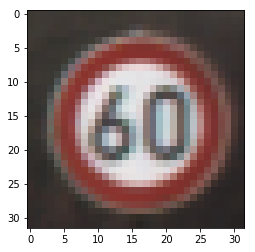

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random

index = random.randint(0, len(X_train))
image = X_train[index]

print("The label of the image = {}".format(y_train[index]))
print("\nThe RGB image is ")
plt.imshow(image)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

''' Shuffle the training data '''
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)
print("The train data has been shuffled")


''' Normarize the train data '''
#X_train = (X_train - np.min(X_train)) / (np.max(X_train) - np.min(X_train))  # ---> min: 0, mean: 0.3, max: 1.0
#X_train = (X_train - 128.0) / 128.0 # ---> min: -1.0, mean: -0.3, max: 1.0 
X_train = (X_train - np.mean(X_train)) / np.mean(X_train) # ---> min: -1.0, mean: 0, max: 2.0
print("The train data has been normarized")


''' Grayscale the train data '''
X_train = np.expand_dims(np.dot(X_train[:, :, :, 0:3], [0.299, 0.587, 0.114]), axis=3)
X_valid = np.expand_dims(np.dot(X_valid[:, :, :, 0:3], [0.299, 0.587, 0.114]), axis=3)
image_shape = X_train[0].shape
print("The train data has been grayscaled")
print("The shape of new X_train {}".format(image_shape))
print("The shape of new X_valid {}".format(X_valid[0].shape))

The train data has been shuffled
The train data has been normarized
The train data has been grayscaled
The shape of new X_train (32, 32, 1)
The shape of new X_valid (32, 32, 1)


### Model Architecture

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten


def LeNet(X):
    
    ''' Hyperparameters '''
    cv_size = 5
    
    outdepth = {
        'cv1' : 6,
        'cv2' : 16,
        'fc1' : 120,
        'fc2' : 84,
        'fc3' : n_classes # number of label classes
    }
        
    indepth = {
        'cv1' : 1, #image_shape[2], # depth of input color channel
        'cv2' : 6,
        'fc1' : cv_size * cv_size * outdepth['cv2'],
        'fc2' : 120,
        'fc3' : 84
    }
    
    mu = 0
    sigma = 0.1
    
    W = {
        'cv1' : tf.Variable(tf.truncated_normal(shape=(cv_size,cv_size,indepth['cv1'],outdepth['cv1']), mean=mu, stddev=sigma)),
        'cv2' : tf.Variable(tf.truncated_normal(shape=(cv_size,cv_size,indepth['cv2'],outdepth['cv2']), mean=mu, stddev=sigma)),
        'fc1' : tf.Variable(tf.truncated_normal(shape=(indepth['fc1'],outdepth['fc1']), mean=mu, stddev=sigma)),
        'fc2' : tf.Variable(tf.truncated_normal(shape=(indepth['fc2'],outdepth['fc2']), mean=mu, stddev=sigma)),
        'fc3' : tf.Variable(tf.truncated_normal(shape=(indepth['fc3'],outdepth['fc3']), mean=mu, stddev=sigma))
    }
    
    b ={
        'cv1' : tf.Variable(tf.zeros(outdepth['cv1'])), #tf.Variable(tf.truncated_normal(shape=outdepth['cv1'], mean=mu, stddev=sigma))
        'cv2' : tf.Variable(tf.zeros(outdepth['cv2'])),
        'fc1' : tf.Variable(tf.zeros(outdepth['fc1'])),
        'fc2' : tf.Variable(tf.zeros(outdepth['fc2'])),
        'fc3' : tf.Variable(tf.zeros(outdepth['fc3']))
    }
    
    stride = 1
    kernel = 2
    
    keep_porb = 1.0
    
    ''' Layer1: convolutional, input=32x32x3 ---> 28x28x6 ---> output=14x14x6 '''    
    conv1 = tf.nn.bias_add(tf.nn.conv2d(X, W['cv1'], strides=[1,stride,stride,1], padding='VALID'), b['cv1'])
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1, ksize=[1,kernel,kernel,1], strides=[1,kernel,kernel,1], padding='VALID')
    
    ''' Layer2: convolutional, input=14x14x6 ---> 10x10x16 ---> output=5x5x16 '''
    conv2 = tf.nn.bias_add(tf.nn.conv2d(conv1, W['cv2'], strides=[1,stride,stride,1], padding='VALID'), b['cv2'])
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1,kernel,kernel,1], strides=[1,kernel,kernel,1], padding='VALID')
    
    ''' flatten, input=5x5x16 ---> output=400 '''
    fc0 = flatten(conv2)
    
    ''' Layer3: fully connection, input=400 ---> output=120 '''
    fc1 = tf.add(tf.matmul(fc0, W['fc1']), b['fc1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_porb)
    
    ''' Layer4: fully connection, input=120 ---> output=84 '''
    fc2 = tf.add(tf.matmul(fc1, W['fc2']), b['fc2'])
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_porb)
    
    ''' Layer5: fully connection, input=84 ---> output=43 '''
    logits = tf.add(tf.matmul(fc2, W['fc3']), b['fc3'])
    
    return logits



### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Training...

EPOCH 1...
Validation Accuracy by train data= 0.834
Validation Accuracy by valid data= 0.688

EPOCH 2...
Validation Accuracy by train data= 0.922
Validation Accuracy by valid data= 0.739

EPOCH 3...
Validation Accuracy by train data= 0.955
Validation Accuracy by valid data= 0.785

EPOCH 4...
Validation Accuracy by train data= 0.970
Validation Accuracy by valid data= 0.807

EPOCH 5...
Validation Accuracy by train data= 0.982
Validation Accuracy by valid data= 0.822

EPOCH 6...
Validation Accuracy by train data= 0.981
Validation Accuracy by valid data= 0.813

EPOCH 7...
Validation Accuracy by train data= 0.981
Validation Accuracy by valid data= 0.807

EPOCH 8...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.787

EPOCH 9...
Validation Accuracy by train data= 0.989
Validation Accuracy by valid data= 0.831

EPOCH 10...
Validation Accuracy by train data= 0.993
Validation Accuracy by valid data= 0.834



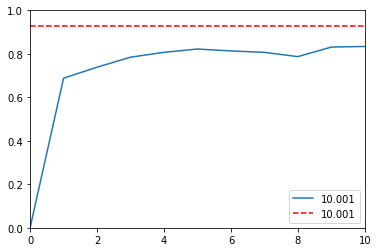

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.823
Validation Accuracy by valid data= 0.647

EPOCH 2...
Validation Accuracy by train data= 0.923
Validation Accuracy by valid data= 0.761

EPOCH 3...
Validation Accuracy by train data= 0.953
Validation Accuracy by valid data= 0.723

EPOCH 4...
Validation Accuracy by train data= 0.968
Validation Accuracy by valid data= 0.748

EPOCH 5...
Validation Accuracy by train data= 0.974
Validation Accuracy by valid data= 0.794

EPOCH 6...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.796

EPOCH 7...
Validation Accuracy by train data= 0.982
Validation Accuracy by valid data= 0.805

EPOCH 8...
Validation Accuracy by train data= 0.991
Validation Accuracy by valid data= 0.798

EPOCH 9...
Validation Accuracy by train data= 0.987
Validation Accuracy by valid data= 0.795

EPOCH 10...
Validation Accuracy by train data= 0.991
Validation Accuracy by valid data= 0.792

EPOCH 11...
Validation Accuracy by

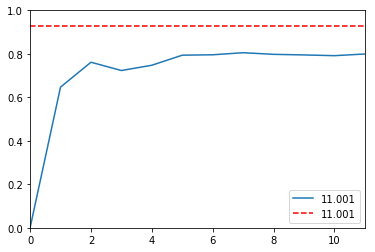

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.845
Validation Accuracy by valid data= 0.727

EPOCH 2...
Validation Accuracy by train data= 0.924
Validation Accuracy by valid data= 0.837

EPOCH 3...
Validation Accuracy by train data= 0.962
Validation Accuracy by valid data= 0.855

EPOCH 4...
Validation Accuracy by train data= 0.976
Validation Accuracy by valid data= 0.873

EPOCH 5...
Validation Accuracy by train data= 0.984
Validation Accuracy by valid data= 0.890

EPOCH 6...
Validation Accuracy by train data= 0.985
Validation Accuracy by valid data= 0.877

EPOCH 7...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.880

EPOCH 8...
Validation Accuracy by train data= 0.989
Validation Accuracy by valid data= 0.895

EPOCH 9...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.882

EPOCH 10...
Validation Accuracy by train data= 0.989
Validation Accuracy by valid data= 0.898

EPOCH 11...
Validation Accuracy by

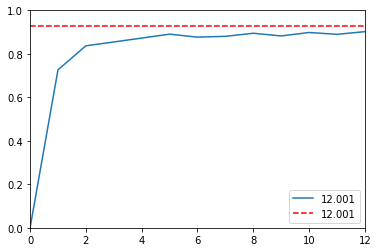

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.844
Validation Accuracy by valid data= 0.743

EPOCH 2...
Validation Accuracy by train data= 0.932
Validation Accuracy by valid data= 0.798

EPOCH 3...
Validation Accuracy by train data= 0.952
Validation Accuracy by valid data= 0.819

EPOCH 4...
Validation Accuracy by train data= 0.973
Validation Accuracy by valid data= 0.851

EPOCH 5...
Validation Accuracy by train data= 0.981
Validation Accuracy by valid data= 0.832

EPOCH 6...
Validation Accuracy by train data= 0.984
Validation Accuracy by valid data= 0.824

EPOCH 7...
Validation Accuracy by train data= 0.992
Validation Accuracy by valid data= 0.876

EPOCH 8...
Validation Accuracy by train data= 0.989
Validation Accuracy by valid data= 0.842

EPOCH 9...
Validation Accuracy by train data= 0.992
Validation Accuracy by valid data= 0.858

EPOCH 10...
Validation Accuracy by train data= 0.987
Validation Accuracy by valid data= 0.821

EPOCH 11...
Validation Accuracy by

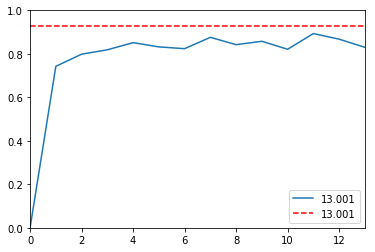

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.823
Validation Accuracy by valid data= 0.592

EPOCH 2...
Validation Accuracy by train data= 0.897
Validation Accuracy by valid data= 0.732

EPOCH 3...
Validation Accuracy by train data= 0.950
Validation Accuracy by valid data= 0.768

EPOCH 4...
Validation Accuracy by train data= 0.964
Validation Accuracy by valid data= 0.767

EPOCH 5...
Validation Accuracy by train data= 0.974
Validation Accuracy by valid data= 0.814

EPOCH 6...
Validation Accuracy by train data= 0.985
Validation Accuracy by valid data= 0.807

EPOCH 7...
Validation Accuracy by train data= 0.983
Validation Accuracy by valid data= 0.834

EPOCH 8...
Validation Accuracy by train data= 0.990
Validation Accuracy by valid data= 0.852

EPOCH 9...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.831

EPOCH 10...
Validation Accuracy by train data= 0.992
Validation Accuracy by valid data= 0.831

EPOCH 11...
Validation Accuracy by

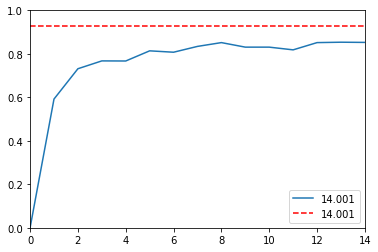

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.827
Validation Accuracy by valid data= 0.661

EPOCH 2...
Validation Accuracy by train data= 0.922
Validation Accuracy by valid data= 0.746

EPOCH 3...
Validation Accuracy by train data= 0.960
Validation Accuracy by valid data= 0.755

EPOCH 4...
Validation Accuracy by train data= 0.969
Validation Accuracy by valid data= 0.800

EPOCH 5...
Validation Accuracy by train data= 0.955
Validation Accuracy by valid data= 0.832

EPOCH 6...
Validation Accuracy by train data= 0.982
Validation Accuracy by valid data= 0.808

EPOCH 7...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.788

EPOCH 8...
Validation Accuracy by train data= 0.984
Validation Accuracy by valid data= 0.798

EPOCH 9...
Validation Accuracy by train data= 0.991
Validation Accuracy by valid data= 0.832

EPOCH 10...
Validation Accuracy by train data= 0.991
Validation Accuracy by valid data= 0.836

EPOCH 11...
Validation Accuracy by

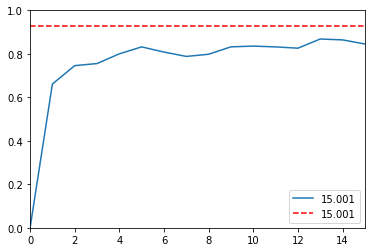

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.841
Validation Accuracy by valid data= 0.747

EPOCH 2...
Validation Accuracy by train data= 0.935
Validation Accuracy by valid data= 0.832

EPOCH 3...
Validation Accuracy by train data= 0.959
Validation Accuracy by valid data= 0.843

EPOCH 4...
Validation Accuracy by train data= 0.966
Validation Accuracy by valid data= 0.873

EPOCH 5...
Validation Accuracy by train data= 0.980
Validation Accuracy by valid data= 0.880

EPOCH 6...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.895

EPOCH 7...
Validation Accuracy by train data= 0.985
Validation Accuracy by valid data= 0.880

EPOCH 8...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.894

EPOCH 9...
Validation Accuracy by train data= 0.993
Validation Accuracy by valid data= 0.910

EPOCH 10...
Validation Accuracy by train data= 0.993
Validation Accuracy by valid data= 0.912

EPOCH 11...
Validation Accuracy by

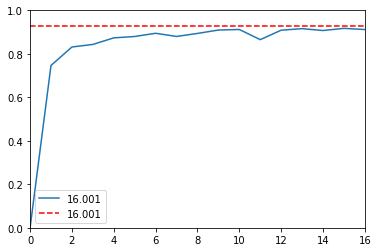

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.851
Validation Accuracy by valid data= 0.697

EPOCH 2...
Validation Accuracy by train data= 0.932
Validation Accuracy by valid data= 0.803

EPOCH 3...
Validation Accuracy by train data= 0.965
Validation Accuracy by valid data= 0.824

EPOCH 4...
Validation Accuracy by train data= 0.978
Validation Accuracy by valid data= 0.838

EPOCH 5...
Validation Accuracy by train data= 0.982
Validation Accuracy by valid data= 0.855

EPOCH 6...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.838

EPOCH 7...
Validation Accuracy by train data= 0.991
Validation Accuracy by valid data= 0.841

EPOCH 8...
Validation Accuracy by train data= 0.993
Validation Accuracy by valid data= 0.846

EPOCH 9...
Validation Accuracy by train data= 0.993
Validation Accuracy by valid data= 0.812

EPOCH 10...
Validation Accuracy by train data= 0.993
Validation Accuracy by valid data= 0.840

EPOCH 11...
Validation Accuracy by

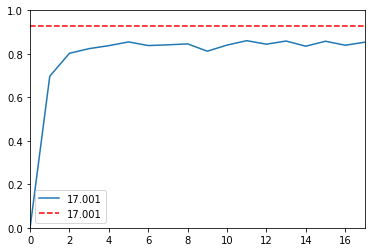

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.810
Validation Accuracy by valid data= 0.648

EPOCH 2...
Validation Accuracy by train data= 0.911
Validation Accuracy by valid data= 0.721

EPOCH 3...
Validation Accuracy by train data= 0.956
Validation Accuracy by valid data= 0.745

EPOCH 4...
Validation Accuracy by train data= 0.954
Validation Accuracy by valid data= 0.791

EPOCH 5...
Validation Accuracy by train data= 0.978
Validation Accuracy by valid data= 0.821

EPOCH 6...
Validation Accuracy by train data= 0.976
Validation Accuracy by valid data= 0.792

EPOCH 7...
Validation Accuracy by train data= 0.985
Validation Accuracy by valid data= 0.827

EPOCH 8...
Validation Accuracy by train data= 0.982
Validation Accuracy by valid data= 0.794

EPOCH 9...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.822

EPOCH 10...
Validation Accuracy by train data= 0.994
Validation Accuracy by valid data= 0.844

EPOCH 11...
Validation Accuracy by

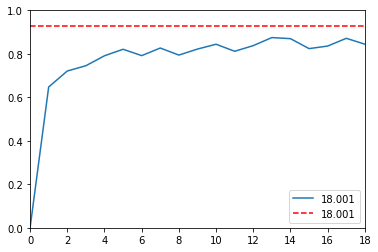

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.851
Validation Accuracy by valid data= 0.692

EPOCH 2...
Validation Accuracy by train data= 0.932
Validation Accuracy by valid data= 0.814

EPOCH 3...
Validation Accuracy by train data= 0.956
Validation Accuracy by valid data= 0.820

EPOCH 4...
Validation Accuracy by train data= 0.969
Validation Accuracy by valid data= 0.835

EPOCH 5...
Validation Accuracy by train data= 0.973
Validation Accuracy by valid data= 0.860

EPOCH 6...
Validation Accuracy by train data= 0.984
Validation Accuracy by valid data= 0.880

EPOCH 7...
Validation Accuracy by train data= 0.987
Validation Accuracy by valid data= 0.881

EPOCH 8...
Validation Accuracy by train data= 0.979
Validation Accuracy by valid data= 0.861

EPOCH 9...
Validation Accuracy by train data= 0.989
Validation Accuracy by valid data= 0.886

EPOCH 10...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.862

EPOCH 11...
Validation Accuracy by

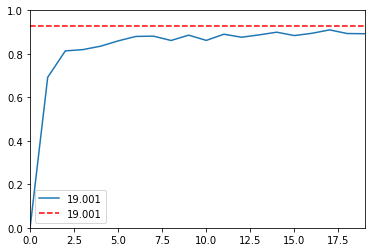

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.915
Validation Accuracy by valid data= 0.796

EPOCH 2...
Validation Accuracy by train data= 0.958
Validation Accuracy by valid data= 0.851

EPOCH 3...
Validation Accuracy by train data= 0.978
Validation Accuracy by valid data= 0.897

EPOCH 4...
Validation Accuracy by train data= 0.977
Validation Accuracy by valid data= 0.896

EPOCH 5...
Validation Accuracy by train data= 0.989
Validation Accuracy by valid data= 0.898

EPOCH 6...
Validation Accuracy by train data= 0.990
Validation Accuracy by valid data= 0.891

EPOCH 7...
Validation Accuracy by train data= 0.993
Validation Accuracy by valid data= 0.919

EPOCH 8...
Validation Accuracy by train data= 0.991
Validation Accuracy by valid data= 0.903

EPOCH 9...
Validation Accuracy by train data= 0.993
Validation Accuracy by valid data= 0.921

EPOCH 10...
Validation Accuracy by train data= 0.995
Validation Accuracy by valid data= 0.915



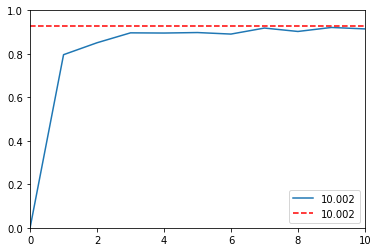

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.912
Validation Accuracy by valid data= 0.798

EPOCH 2...
Validation Accuracy by train data= 0.955
Validation Accuracy by valid data= 0.844

EPOCH 3...
Validation Accuracy by train data= 0.976
Validation Accuracy by valid data= 0.878

EPOCH 4...
Validation Accuracy by train data= 0.982
Validation Accuracy by valid data= 0.864

EPOCH 5...
Validation Accuracy by train data= 0.985
Validation Accuracy by valid data= 0.888

EPOCH 6...
Validation Accuracy by train data= 0.979
Validation Accuracy by valid data= 0.881

EPOCH 7...
Validation Accuracy by train data= 0.978
Validation Accuracy by valid data= 0.877

EPOCH 8...
Validation Accuracy by train data= 0.991
Validation Accuracy by valid data= 0.901

EPOCH 9...
Validation Accuracy by train data= 0.993
Validation Accuracy by valid data= 0.920

EPOCH 10...
Validation Accuracy by train data= 0.995
Validation Accuracy by valid data= 0.920

EPOCH 11...
Validation Accuracy by

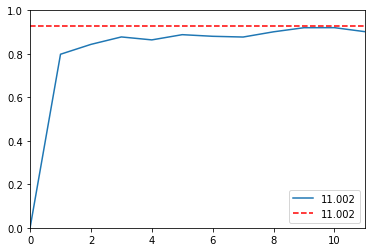

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.913
Validation Accuracy by valid data= 0.806

EPOCH 2...
Validation Accuracy by train data= 0.960
Validation Accuracy by valid data= 0.865

EPOCH 3...
Validation Accuracy by train data= 0.977
Validation Accuracy by valid data= 0.875

EPOCH 4...
Validation Accuracy by train data= 0.983
Validation Accuracy by valid data= 0.849

EPOCH 5...
Validation Accuracy by train data= 0.989
Validation Accuracy by valid data= 0.875

EPOCH 6...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.881

EPOCH 7...
Validation Accuracy by train data= 0.993
Validation Accuracy by valid data= 0.893

EPOCH 8...
Validation Accuracy by train data= 0.993
Validation Accuracy by valid data= 0.887

EPOCH 9...
Validation Accuracy by train data= 0.993
Validation Accuracy by valid data= 0.880

EPOCH 10...
Validation Accuracy by train data= 0.993
Validation Accuracy by valid data= 0.908

EPOCH 11...
Validation Accuracy by

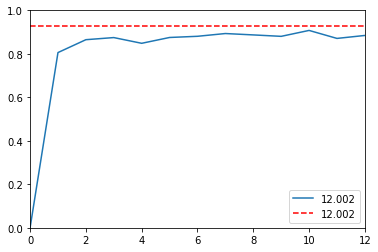

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.893
Validation Accuracy by valid data= 0.801

EPOCH 2...
Validation Accuracy by train data= 0.957
Validation Accuracy by valid data= 0.807

EPOCH 3...
Validation Accuracy by train data= 0.974
Validation Accuracy by valid data= 0.854

EPOCH 4...
Validation Accuracy by train data= 0.982
Validation Accuracy by valid data= 0.884

EPOCH 5...
Validation Accuracy by train data= 0.990
Validation Accuracy by valid data= 0.885

EPOCH 6...
Validation Accuracy by train data= 0.993
Validation Accuracy by valid data= 0.878

EPOCH 7...
Validation Accuracy by train data= 0.993
Validation Accuracy by valid data= 0.898

EPOCH 8...
Validation Accuracy by train data= 0.990
Validation Accuracy by valid data= 0.900

EPOCH 9...
Validation Accuracy by train data= 0.998
Validation Accuracy by valid data= 0.882

EPOCH 10...
Validation Accuracy by train data= 0.992
Validation Accuracy by valid data= 0.883

EPOCH 11...
Validation Accuracy by

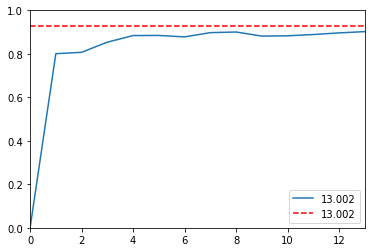

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.910
Validation Accuracy by valid data= 0.766

EPOCH 2...
Validation Accuracy by train data= 0.958
Validation Accuracy by valid data= 0.793

EPOCH 3...
Validation Accuracy by train data= 0.975
Validation Accuracy by valid data= 0.825

EPOCH 4...
Validation Accuracy by train data= 0.980
Validation Accuracy by valid data= 0.844

EPOCH 5...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.841

EPOCH 6...
Validation Accuracy by train data= 0.991
Validation Accuracy by valid data= 0.847

EPOCH 7...
Validation Accuracy by train data= 0.990
Validation Accuracy by valid data= 0.841

EPOCH 8...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.854

EPOCH 9...
Validation Accuracy by train data= 0.996
Validation Accuracy by valid data= 0.873

EPOCH 10...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.880

EPOCH 11...
Validation Accuracy by

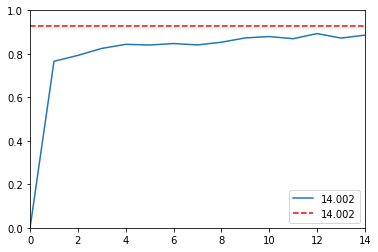

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.907
Validation Accuracy by valid data= 0.784

EPOCH 2...
Validation Accuracy by train data= 0.963
Validation Accuracy by valid data= 0.870

EPOCH 3...
Validation Accuracy by train data= 0.979
Validation Accuracy by valid data= 0.872

EPOCH 4...
Validation Accuracy by train data= 0.979
Validation Accuracy by valid data= 0.879

EPOCH 5...
Validation Accuracy by train data= 0.985
Validation Accuracy by valid data= 0.889

EPOCH 6...
Validation Accuracy by train data= 0.980
Validation Accuracy by valid data= 0.882

EPOCH 7...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.881

EPOCH 8...
Validation Accuracy by train data= 0.993
Validation Accuracy by valid data= 0.901

EPOCH 9...
Validation Accuracy by train data= 0.992
Validation Accuracy by valid data= 0.906

EPOCH 10...
Validation Accuracy by train data= 0.990
Validation Accuracy by valid data= 0.907

EPOCH 11...
Validation Accuracy by

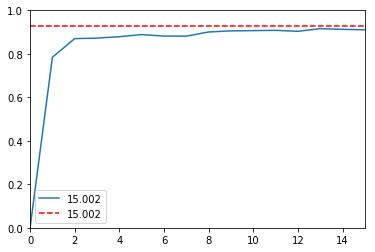

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.896
Validation Accuracy by valid data= 0.815

EPOCH 2...
Validation Accuracy by train data= 0.963
Validation Accuracy by valid data= 0.874

EPOCH 3...
Validation Accuracy by train data= 0.974
Validation Accuracy by valid data= 0.882

EPOCH 4...
Validation Accuracy by train data= 0.982
Validation Accuracy by valid data= 0.896

EPOCH 5...
Validation Accuracy by train data= 0.990
Validation Accuracy by valid data= 0.917

EPOCH 6...
Validation Accuracy by train data= 0.984
Validation Accuracy by valid data= 0.913

EPOCH 7...
Validation Accuracy by train data= 0.985
Validation Accuracy by valid data= 0.904

EPOCH 8...
Validation Accuracy by train data= 0.991
Validation Accuracy by valid data= 0.892

EPOCH 9...
Validation Accuracy by train data= 0.995
Validation Accuracy by valid data= 0.911

EPOCH 10...
Validation Accuracy by train data= 0.996
Validation Accuracy by valid data= 0.925

EPOCH 11...
Validation Accuracy by

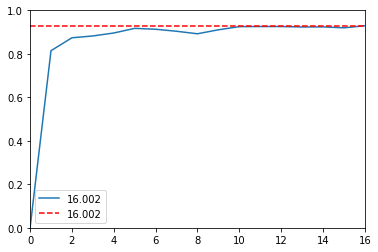

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.901
Validation Accuracy by valid data= 0.825

EPOCH 2...
Validation Accuracy by train data= 0.958
Validation Accuracy by valid data= 0.849

EPOCH 3...
Validation Accuracy by train data= 0.976
Validation Accuracy by valid data= 0.879

EPOCH 4...
Validation Accuracy by train data= 0.981
Validation Accuracy by valid data= 0.865

EPOCH 5...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.904

EPOCH 6...
Validation Accuracy by train data= 0.989
Validation Accuracy by valid data= 0.888

EPOCH 7...
Validation Accuracy by train data= 0.991
Validation Accuracy by valid data= 0.909

EPOCH 8...
Validation Accuracy by train data= 0.993
Validation Accuracy by valid data= 0.913

EPOCH 9...
Validation Accuracy by train data= 0.991
Validation Accuracy by valid data= 0.880

EPOCH 10...
Validation Accuracy by train data= 0.995
Validation Accuracy by valid data= 0.900

EPOCH 11...
Validation Accuracy by

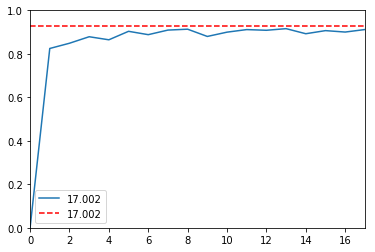

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.896
Validation Accuracy by valid data= 0.777

EPOCH 2...
Validation Accuracy by train data= 0.958
Validation Accuracy by valid data= 0.823

EPOCH 3...
Validation Accuracy by train data= 0.975
Validation Accuracy by valid data= 0.900

EPOCH 4...
Validation Accuracy by train data= 0.987
Validation Accuracy by valid data= 0.902

EPOCH 5...
Validation Accuracy by train data= 0.987
Validation Accuracy by valid data= 0.915

EPOCH 6...
Validation Accuracy by train data= 0.983
Validation Accuracy by valid data= 0.894

EPOCH 7...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.875

EPOCH 8...
Validation Accuracy by train data= 0.990
Validation Accuracy by valid data= 0.900

EPOCH 9...
Validation Accuracy by train data= 0.989
Validation Accuracy by valid data= 0.922

EPOCH 10...
Validation Accuracy by train data= 0.992
Validation Accuracy by valid data= 0.911

EPOCH 11...
Validation Accuracy by

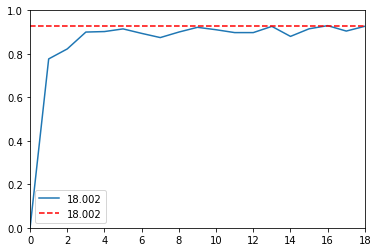

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.910
Validation Accuracy by valid data= 0.788

EPOCH 2...
Validation Accuracy by train data= 0.967
Validation Accuracy by valid data= 0.846

EPOCH 3...
Validation Accuracy by train data= 0.980
Validation Accuracy by valid data= 0.849

EPOCH 4...
Validation Accuracy by train data= 0.982
Validation Accuracy by valid data= 0.893

EPOCH 5...
Validation Accuracy by train data= 0.985
Validation Accuracy by valid data= 0.883

EPOCH 6...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.879

EPOCH 7...
Validation Accuracy by train data= 0.991
Validation Accuracy by valid data= 0.886

EPOCH 8...
Validation Accuracy by train data= 0.991
Validation Accuracy by valid data= 0.879

EPOCH 9...
Validation Accuracy by train data= 0.982
Validation Accuracy by valid data= 0.897

EPOCH 10...
Validation Accuracy by train data= 0.992
Validation Accuracy by valid data= 0.873

EPOCH 11...
Validation Accuracy by

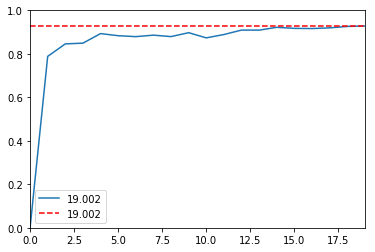

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.945
Validation Accuracy by valid data= 0.869

EPOCH 2...
Validation Accuracy by train data= 0.969
Validation Accuracy by valid data= 0.876

EPOCH 3...
Validation Accuracy by train data= 0.984
Validation Accuracy by valid data= 0.887

EPOCH 4...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.875

EPOCH 5...
Validation Accuracy by train data= 0.984
Validation Accuracy by valid data= 0.899

EPOCH 6...
Validation Accuracy by train data= 0.991
Validation Accuracy by valid data= 0.920

EPOCH 7...
Validation Accuracy by train data= 0.993
Validation Accuracy by valid data= 0.911

EPOCH 8...
Validation Accuracy by train data= 0.994
Validation Accuracy by valid data= 0.914

EPOCH 9...
Validation Accuracy by train data= 0.984
Validation Accuracy by valid data= 0.905

EPOCH 10...
Validation Accuracy by train data= 0.989
Validation Accuracy by valid data= 0.917



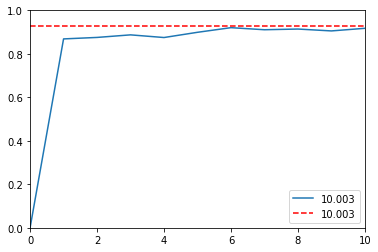

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.936
Validation Accuracy by valid data= 0.831

EPOCH 2...
Validation Accuracy by train data= 0.966
Validation Accuracy by valid data= 0.878

EPOCH 3...
Validation Accuracy by train data= 0.984
Validation Accuracy by valid data= 0.898

EPOCH 4...
Validation Accuracy by train data= 0.987
Validation Accuracy by valid data= 0.910

EPOCH 5...
Validation Accuracy by train data= 0.987
Validation Accuracy by valid data= 0.918

EPOCH 6...
Validation Accuracy by train data= 0.983
Validation Accuracy by valid data= 0.906

EPOCH 7...
Validation Accuracy by train data= 0.991
Validation Accuracy by valid data= 0.921

EPOCH 8...
Validation Accuracy by train data= 0.993
Validation Accuracy by valid data= 0.917

EPOCH 9...
Validation Accuracy by train data= 0.993
Validation Accuracy by valid data= 0.912

EPOCH 10...
Validation Accuracy by train data= 0.996
Validation Accuracy by valid data= 0.920

EPOCH 11...
Validation Accuracy by

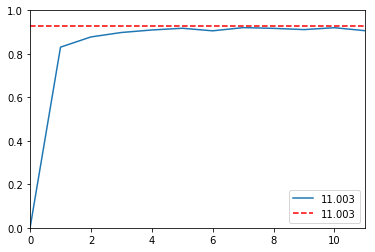

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.942
Validation Accuracy by valid data= 0.864

EPOCH 2...
Validation Accuracy by train data= 0.978
Validation Accuracy by valid data= 0.891

EPOCH 3...
Validation Accuracy by train data= 0.972
Validation Accuracy by valid data= 0.916

EPOCH 4...
Validation Accuracy by train data= 0.983
Validation Accuracy by valid data= 0.927

EPOCH 5...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.912

EPOCH 6...
Validation Accuracy by train data= 0.980
Validation Accuracy by valid data= 0.899

EPOCH 7...
Validation Accuracy by train data= 0.994
Validation Accuracy by valid data= 0.926

EPOCH 8...
Validation Accuracy by train data= 0.994
Validation Accuracy by valid data= 0.919

EPOCH 9...
Validation Accuracy by train data= 0.987
Validation Accuracy by valid data= 0.893

EPOCH 10...
Validation Accuracy by train data= 0.984
Validation Accuracy by valid data= 0.906

EPOCH 11...
Validation Accuracy by

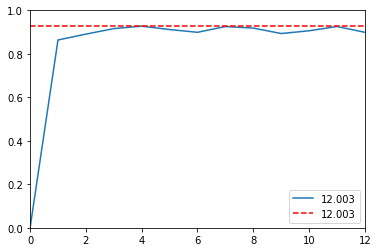

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.937
Validation Accuracy by valid data= 0.800

EPOCH 2...
Validation Accuracy by train data= 0.974
Validation Accuracy by valid data= 0.858

EPOCH 3...
Validation Accuracy by train data= 0.968
Validation Accuracy by valid data= 0.849

EPOCH 4...
Validation Accuracy by train data= 0.991
Validation Accuracy by valid data= 0.889

EPOCH 5...
Validation Accuracy by train data= 0.984
Validation Accuracy by valid data= 0.882

EPOCH 6...
Validation Accuracy by train data= 0.982
Validation Accuracy by valid data= 0.873

EPOCH 7...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.878

EPOCH 8...
Validation Accuracy by train data= 0.994
Validation Accuracy by valid data= 0.886

EPOCH 9...
Validation Accuracy by train data= 0.993
Validation Accuracy by valid data= 0.894

EPOCH 10...
Validation Accuracy by train data= 0.995
Validation Accuracy by valid data= 0.880

EPOCH 11...
Validation Accuracy by

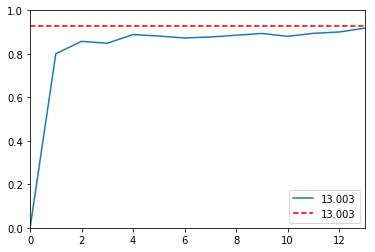

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.940
Validation Accuracy by valid data= 0.832

EPOCH 2...
Validation Accuracy by train data= 0.966
Validation Accuracy by valid data= 0.888

EPOCH 3...
Validation Accuracy by train data= 0.976
Validation Accuracy by valid data= 0.874

EPOCH 4...
Validation Accuracy by train data= 0.985
Validation Accuracy by valid data= 0.900

EPOCH 5...
Validation Accuracy by train data= 0.982
Validation Accuracy by valid data= 0.901

EPOCH 6...
Validation Accuracy by train data= 0.985
Validation Accuracy by valid data= 0.882

EPOCH 7...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.887

EPOCH 8...
Validation Accuracy by train data= 0.992
Validation Accuracy by valid data= 0.910

EPOCH 9...
Validation Accuracy by train data= 0.992
Validation Accuracy by valid data= 0.907

EPOCH 10...
Validation Accuracy by train data= 0.992
Validation Accuracy by valid data= 0.924

EPOCH 11...
Validation Accuracy by

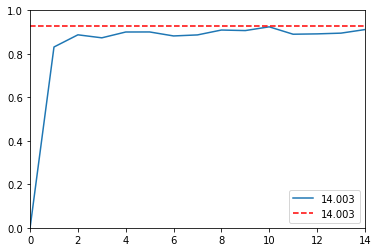

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.922
Validation Accuracy by valid data= 0.804

EPOCH 2...
Validation Accuracy by train data= 0.967
Validation Accuracy by valid data= 0.870

EPOCH 3...
Validation Accuracy by train data= 0.981
Validation Accuracy by valid data= 0.887

EPOCH 4...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.905

EPOCH 5...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.922

EPOCH 6...
Validation Accuracy by train data= 0.990
Validation Accuracy by valid data= 0.894

EPOCH 7...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.900

EPOCH 8...
Validation Accuracy by train data= 0.993
Validation Accuracy by valid data= 0.922

EPOCH 9...
Validation Accuracy by train data= 0.987
Validation Accuracy by valid data= 0.917

EPOCH 10...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.919

EPOCH 11...
Validation Accuracy by

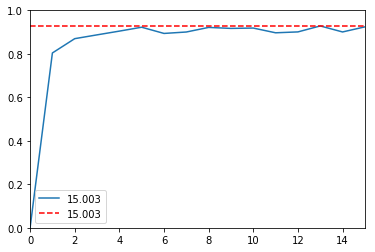

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.925
Validation Accuracy by valid data= 0.822

EPOCH 2...
Validation Accuracy by train data= 0.969
Validation Accuracy by valid data= 0.902

EPOCH 3...
Validation Accuracy by train data= 0.982
Validation Accuracy by valid data= 0.917

EPOCH 4...
Validation Accuracy by train data= 0.984
Validation Accuracy by valid data= 0.911

EPOCH 5...
Validation Accuracy by train data= 0.992
Validation Accuracy by valid data= 0.916

EPOCH 6...
Validation Accuracy by train data= 0.994
Validation Accuracy by valid data= 0.922

EPOCH 7...
Validation Accuracy by train data= 0.993
Validation Accuracy by valid data= 0.909

EPOCH 8...
Validation Accuracy by train data= 0.994
Validation Accuracy by valid data= 0.934

EPOCH 9...
Validation Accuracy by train data= 0.994
Validation Accuracy by valid data= 0.930

EPOCH 10...
Validation Accuracy by train data= 0.990
Validation Accuracy by valid data= 0.928

EPOCH 11...
Validation Accuracy by

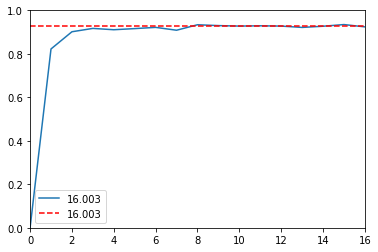

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.913
Validation Accuracy by valid data= 0.806

EPOCH 2...
Validation Accuracy by train data= 0.964
Validation Accuracy by valid data= 0.883

EPOCH 3...
Validation Accuracy by train data= 0.973
Validation Accuracy by valid data= 0.886

EPOCH 4...
Validation Accuracy by train data= 0.987
Validation Accuracy by valid data= 0.888

EPOCH 5...
Validation Accuracy by train data= 0.990
Validation Accuracy by valid data= 0.894

EPOCH 6...
Validation Accuracy by train data= 0.992
Validation Accuracy by valid data= 0.893

EPOCH 7...
Validation Accuracy by train data= 0.987
Validation Accuracy by valid data= 0.892

EPOCH 8...
Validation Accuracy by train data= 0.992
Validation Accuracy by valid data= 0.904

EPOCH 9...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.851

EPOCH 10...
Validation Accuracy by train data= 0.985
Validation Accuracy by valid data= 0.904

EPOCH 11...
Validation Accuracy by

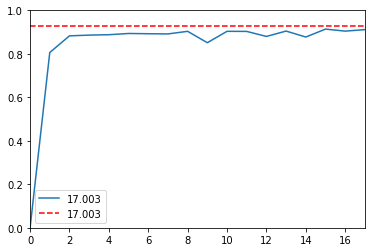

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.908
Validation Accuracy by valid data= 0.837

EPOCH 2...
Validation Accuracy by train data= 0.962
Validation Accuracy by valid data= 0.902

EPOCH 3...
Validation Accuracy by train data= 0.984
Validation Accuracy by valid data= 0.912

EPOCH 4...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.923

EPOCH 5...
Validation Accuracy by train data= 0.989
Validation Accuracy by valid data= 0.923

EPOCH 6...
Validation Accuracy by train data= 0.991
Validation Accuracy by valid data= 0.912

EPOCH 7...
Validation Accuracy by train data= 0.983
Validation Accuracy by valid data= 0.908

EPOCH 8...
Validation Accuracy by train data= 0.990
Validation Accuracy by valid data= 0.920

EPOCH 9...
Validation Accuracy by train data= 0.993
Validation Accuracy by valid data= 0.927

EPOCH 10...
Validation Accuracy by train data= 0.993
Validation Accuracy by valid data= 0.940

EPOCH 11...
Validation Accuracy by

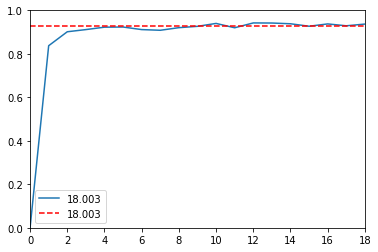

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.949
Validation Accuracy by valid data= 0.816

EPOCH 2...
Validation Accuracy by train data= 0.973
Validation Accuracy by valid data= 0.873

EPOCH 3...
Validation Accuracy by train data= 0.984
Validation Accuracy by valid data= 0.865

EPOCH 4...
Validation Accuracy by train data= 0.989
Validation Accuracy by valid data= 0.906

EPOCH 5...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.908

EPOCH 6...
Validation Accuracy by train data= 0.987
Validation Accuracy by valid data= 0.900

EPOCH 7...
Validation Accuracy by train data= 0.990
Validation Accuracy by valid data= 0.925

EPOCH 8...
Validation Accuracy by train data= 0.989
Validation Accuracy by valid data= 0.910

EPOCH 9...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.867

EPOCH 10...
Validation Accuracy by train data= 0.990
Validation Accuracy by valid data= 0.914

EPOCH 11...
Validation Accuracy by

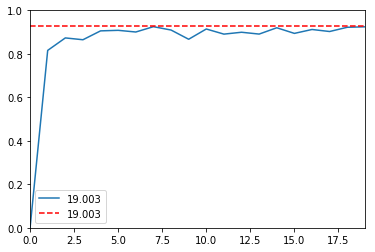

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.950
Validation Accuracy by valid data= 0.883

EPOCH 2...
Validation Accuracy by train data= 0.971
Validation Accuracy by valid data= 0.900

EPOCH 3...
Validation Accuracy by train data= 0.982
Validation Accuracy by valid data= 0.924

EPOCH 4...
Validation Accuracy by train data= 0.981
Validation Accuracy by valid data= 0.920

EPOCH 5...
Validation Accuracy by train data= 0.984
Validation Accuracy by valid data= 0.898

EPOCH 6...
Validation Accuracy by train data= 0.989
Validation Accuracy by valid data= 0.896

EPOCH 7...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.914

EPOCH 8...
Validation Accuracy by train data= 0.990
Validation Accuracy by valid data= 0.937

EPOCH 9...
Validation Accuracy by train data= 0.990
Validation Accuracy by valid data= 0.915

EPOCH 10...
Validation Accuracy by train data= 0.992
Validation Accuracy by valid data= 0.920



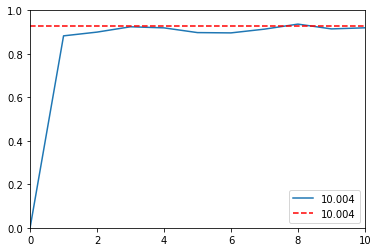

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.947
Validation Accuracy by valid data= 0.878

EPOCH 2...
Validation Accuracy by train data= 0.972
Validation Accuracy by valid data= 0.893

EPOCH 3...
Validation Accuracy by train data= 0.985
Validation Accuracy by valid data= 0.890

EPOCH 4...
Validation Accuracy by train data= 0.990
Validation Accuracy by valid data= 0.915

EPOCH 5...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.912

EPOCH 6...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.899

EPOCH 7...
Validation Accuracy by train data= 0.976
Validation Accuracy by valid data= 0.905

EPOCH 8...
Validation Accuracy by train data= 0.974
Validation Accuracy by valid data= 0.904

EPOCH 9...
Validation Accuracy by train data= 0.995
Validation Accuracy by valid data= 0.937

EPOCH 10...
Validation Accuracy by train data= 0.984
Validation Accuracy by valid data= 0.904

EPOCH 11...
Validation Accuracy by

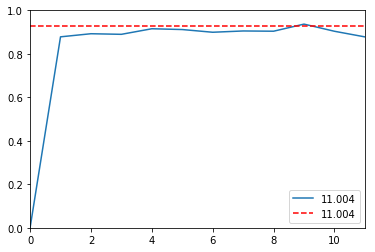

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.912
Validation Accuracy by valid data= 0.795

EPOCH 2...
Validation Accuracy by train data= 0.971
Validation Accuracy by valid data= 0.879

EPOCH 3...
Validation Accuracy by train data= 0.972
Validation Accuracy by valid data= 0.862

EPOCH 4...
Validation Accuracy by train data= 0.980
Validation Accuracy by valid data= 0.900

EPOCH 5...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.909

EPOCH 6...
Validation Accuracy by train data= 0.983
Validation Accuracy by valid data= 0.887

EPOCH 7...
Validation Accuracy by train data= 0.981
Validation Accuracy by valid data= 0.907

EPOCH 8...
Validation Accuracy by train data= 0.993
Validation Accuracy by valid data= 0.905

EPOCH 9...
Validation Accuracy by train data= 0.990
Validation Accuracy by valid data= 0.905

EPOCH 10...
Validation Accuracy by train data= 0.982
Validation Accuracy by valid data= 0.899

EPOCH 11...
Validation Accuracy by

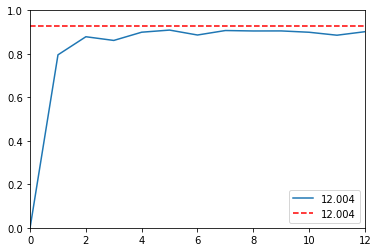

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.934
Validation Accuracy by valid data= 0.821

EPOCH 2...
Validation Accuracy by train data= 0.963
Validation Accuracy by valid data= 0.883

EPOCH 3...
Validation Accuracy by train data= 0.983
Validation Accuracy by valid data= 0.908

EPOCH 4...
Validation Accuracy by train data= 0.987
Validation Accuracy by valid data= 0.901

EPOCH 5...
Validation Accuracy by train data= 0.977
Validation Accuracy by valid data= 0.874

EPOCH 6...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.899

EPOCH 7...
Validation Accuracy by train data= 0.985
Validation Accuracy by valid data= 0.871

EPOCH 8...
Validation Accuracy by train data= 0.992
Validation Accuracy by valid data= 0.918

EPOCH 9...
Validation Accuracy by train data= 0.980
Validation Accuracy by valid data= 0.899

EPOCH 10...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.900

EPOCH 11...
Validation Accuracy by

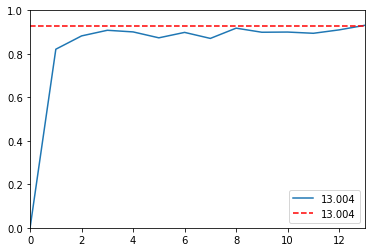

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.949
Validation Accuracy by valid data= 0.859

EPOCH 2...
Validation Accuracy by train data= 0.964
Validation Accuracy by valid data= 0.883

EPOCH 3...
Validation Accuracy by train data= 0.979
Validation Accuracy by valid data= 0.902

EPOCH 4...
Validation Accuracy by train data= 0.978
Validation Accuracy by valid data= 0.881

EPOCH 5...
Validation Accuracy by train data= 0.987
Validation Accuracy by valid data= 0.915

EPOCH 6...
Validation Accuracy by train data= 0.987
Validation Accuracy by valid data= 0.905

EPOCH 7...
Validation Accuracy by train data= 0.991
Validation Accuracy by valid data= 0.903

EPOCH 8...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.913

EPOCH 9...
Validation Accuracy by train data= 0.990
Validation Accuracy by valid data= 0.917

EPOCH 10...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.893

EPOCH 11...
Validation Accuracy by

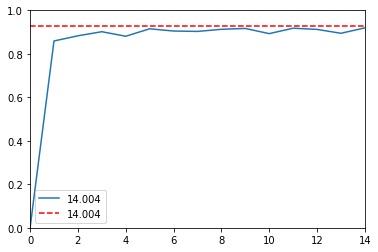

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.934
Validation Accuracy by valid data= 0.846

EPOCH 2...
Validation Accuracy by train data= 0.968
Validation Accuracy by valid data= 0.889

EPOCH 3...
Validation Accuracy by train data= 0.979
Validation Accuracy by valid data= 0.910

EPOCH 4...
Validation Accuracy by train data= 0.984
Validation Accuracy by valid data= 0.921

EPOCH 5...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.913

EPOCH 6...
Validation Accuracy by train data= 0.985
Validation Accuracy by valid data= 0.898

EPOCH 7...
Validation Accuracy by train data= 0.987
Validation Accuracy by valid data= 0.912

EPOCH 8...
Validation Accuracy by train data= 0.974
Validation Accuracy by valid data= 0.897

EPOCH 9...
Validation Accuracy by train data= 0.994
Validation Accuracy by valid data= 0.928

EPOCH 10...
Validation Accuracy by train data= 0.987
Validation Accuracy by valid data= 0.919

EPOCH 11...
Validation Accuracy by

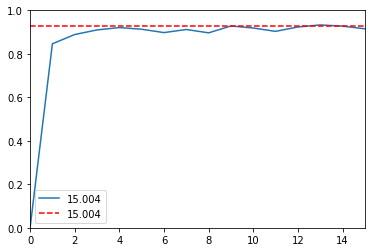

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.937
Validation Accuracy by valid data= 0.831

EPOCH 2...
Validation Accuracy by train data= 0.959
Validation Accuracy by valid data= 0.865

EPOCH 3...
Validation Accuracy by train data= 0.970
Validation Accuracy by valid data= 0.880

EPOCH 4...
Validation Accuracy by train data= 0.979
Validation Accuracy by valid data= 0.880

EPOCH 5...
Validation Accuracy by train data= 0.989
Validation Accuracy by valid data= 0.901

EPOCH 6...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.905

EPOCH 7...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.906

EPOCH 8...
Validation Accuracy by train data= 0.992
Validation Accuracy by valid data= 0.926

EPOCH 9...
Validation Accuracy by train data= 0.992
Validation Accuracy by valid data= 0.909

EPOCH 10...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.897

EPOCH 11...
Validation Accuracy by

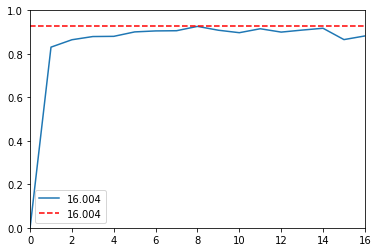

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.941
Validation Accuracy by valid data= 0.871

EPOCH 2...
Validation Accuracy by train data= 0.959
Validation Accuracy by valid data= 0.886

EPOCH 3...
Validation Accuracy by train data= 0.978
Validation Accuracy by valid data= 0.902

EPOCH 4...
Validation Accuracy by train data= 0.984
Validation Accuracy by valid data= 0.915

EPOCH 5...
Validation Accuracy by train data= 0.983
Validation Accuracy by valid data= 0.905

EPOCH 6...
Validation Accuracy by train data= 0.989
Validation Accuracy by valid data= 0.893

EPOCH 7...
Validation Accuracy by train data= 0.991
Validation Accuracy by valid data= 0.920

EPOCH 8...
Validation Accuracy by train data= 0.987
Validation Accuracy by valid data= 0.913

EPOCH 9...
Validation Accuracy by train data= 0.985
Validation Accuracy by valid data= 0.890

EPOCH 10...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.905

EPOCH 11...
Validation Accuracy by

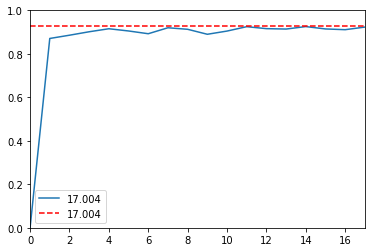

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.918
Validation Accuracy by valid data= 0.856

EPOCH 2...
Validation Accuracy by train data= 0.976
Validation Accuracy by valid data= 0.907

EPOCH 3...
Validation Accuracy by train data= 0.979
Validation Accuracy by valid data= 0.884

EPOCH 4...
Validation Accuracy by train data= 0.985
Validation Accuracy by valid data= 0.897

EPOCH 5...
Validation Accuracy by train data= 0.982
Validation Accuracy by valid data= 0.917

EPOCH 6...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.917

EPOCH 7...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.905

EPOCH 8...
Validation Accuracy by train data= 0.984
Validation Accuracy by valid data= 0.912

EPOCH 9...
Validation Accuracy by train data= 0.989
Validation Accuracy by valid data= 0.906

EPOCH 10...
Validation Accuracy by train data= 0.989
Validation Accuracy by valid data= 0.921

EPOCH 11...
Validation Accuracy by

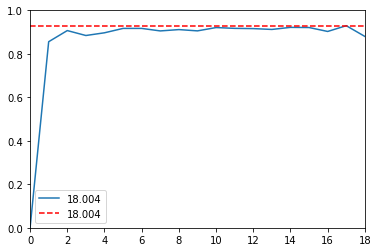

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.947
Validation Accuracy by valid data= 0.839

EPOCH 2...
Validation Accuracy by train data= 0.979
Validation Accuracy by valid data= 0.897

EPOCH 3...
Validation Accuracy by train data= 0.970
Validation Accuracy by valid data= 0.883

EPOCH 4...
Validation Accuracy by train data= 0.982
Validation Accuracy by valid data= 0.921

EPOCH 5...
Validation Accuracy by train data= 0.981
Validation Accuracy by valid data= 0.884

EPOCH 6...
Validation Accuracy by train data= 0.991
Validation Accuracy by valid data= 0.922

EPOCH 7...
Validation Accuracy by train data= 0.994
Validation Accuracy by valid data= 0.920

EPOCH 8...
Validation Accuracy by train data= 0.994
Validation Accuracy by valid data= 0.922

EPOCH 9...
Validation Accuracy by train data= 0.995
Validation Accuracy by valid data= 0.914

EPOCH 10...
Validation Accuracy by train data= 0.985
Validation Accuracy by valid data= 0.856

EPOCH 11...
Validation Accuracy by

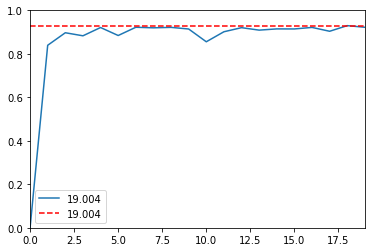

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.944
Validation Accuracy by valid data= 0.845

EPOCH 2...
Validation Accuracy by train data= 0.966
Validation Accuracy by valid data= 0.890

EPOCH 3...
Validation Accuracy by train data= 0.972
Validation Accuracy by valid data= 0.900

EPOCH 4...
Validation Accuracy by train data= 0.983
Validation Accuracy by valid data= 0.891

EPOCH 5...
Validation Accuracy by train data= 0.990
Validation Accuracy by valid data= 0.917

EPOCH 6...
Validation Accuracy by train data= 0.983
Validation Accuracy by valid data= 0.868

EPOCH 7...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.892

EPOCH 8...
Validation Accuracy by train data= 0.979
Validation Accuracy by valid data= 0.880

EPOCH 9...
Validation Accuracy by train data= 0.983
Validation Accuracy by valid data= 0.885

EPOCH 10...
Validation Accuracy by train data= 0.985
Validation Accuracy by valid data= 0.882



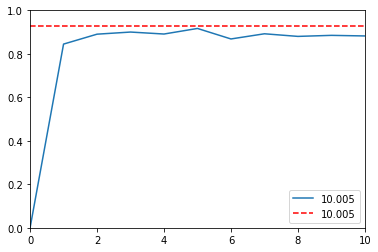

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.940
Validation Accuracy by valid data= 0.876

EPOCH 2...
Validation Accuracy by train data= 0.970
Validation Accuracy by valid data= 0.869

EPOCH 3...
Validation Accuracy by train data= 0.979
Validation Accuracy by valid data= 0.905

EPOCH 4...
Validation Accuracy by train data= 0.980
Validation Accuracy by valid data= 0.912

EPOCH 5...
Validation Accuracy by train data= 0.958
Validation Accuracy by valid data= 0.866

EPOCH 6...
Validation Accuracy by train data= 0.991
Validation Accuracy by valid data= 0.917

EPOCH 7...
Validation Accuracy by train data= 0.983
Validation Accuracy by valid data= 0.917

EPOCH 8...
Validation Accuracy by train data= 0.994
Validation Accuracy by valid data= 0.926

EPOCH 9...
Validation Accuracy by train data= 0.971
Validation Accuracy by valid data= 0.917

EPOCH 10...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.876

EPOCH 11...
Validation Accuracy by

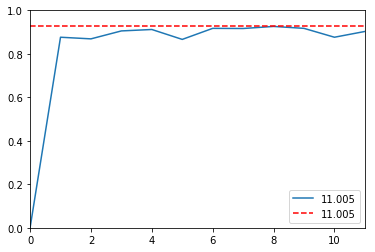

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.944
Validation Accuracy by valid data= 0.869

EPOCH 2...
Validation Accuracy by train data= 0.975
Validation Accuracy by valid data= 0.880

EPOCH 3...
Validation Accuracy by train data= 0.980
Validation Accuracy by valid data= 0.875

EPOCH 4...
Validation Accuracy by train data= 0.970
Validation Accuracy by valid data= 0.863

EPOCH 5...
Validation Accuracy by train data= 0.987
Validation Accuracy by valid data= 0.897

EPOCH 6...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.886

EPOCH 7...
Validation Accuracy by train data= 0.983
Validation Accuracy by valid data= 0.898

EPOCH 8...
Validation Accuracy by train data= 0.983
Validation Accuracy by valid data= 0.869

EPOCH 9...
Validation Accuracy by train data= 0.989
Validation Accuracy by valid data= 0.908

EPOCH 10...
Validation Accuracy by train data= 0.989
Validation Accuracy by valid data= 0.914

EPOCH 11...
Validation Accuracy by

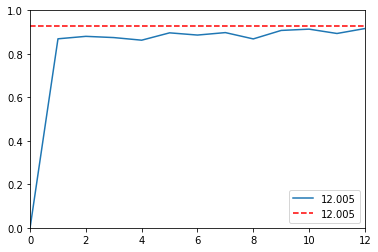

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.928
Validation Accuracy by valid data= 0.837

EPOCH 2...
Validation Accuracy by train data= 0.972
Validation Accuracy by valid data= 0.907

EPOCH 3...
Validation Accuracy by train data= 0.972
Validation Accuracy by valid data= 0.891

EPOCH 4...
Validation Accuracy by train data= 0.970
Validation Accuracy by valid data= 0.865

EPOCH 5...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.912

EPOCH 6...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.913

EPOCH 7...
Validation Accuracy by train data= 0.993
Validation Accuracy by valid data= 0.903

EPOCH 8...
Validation Accuracy by train data= 0.984
Validation Accuracy by valid data= 0.894

EPOCH 9...
Validation Accuracy by train data= 0.995
Validation Accuracy by valid data= 0.925

EPOCH 10...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.914

EPOCH 11...
Validation Accuracy by

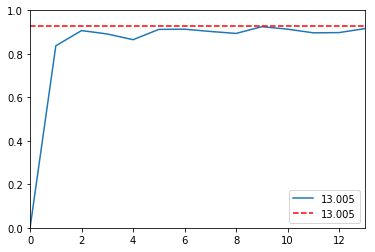

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.924
Validation Accuracy by valid data= 0.822

EPOCH 2...
Validation Accuracy by train data= 0.969
Validation Accuracy by valid data= 0.887

EPOCH 3...
Validation Accuracy by train data= 0.976
Validation Accuracy by valid data= 0.892

EPOCH 4...
Validation Accuracy by train data= 0.975
Validation Accuracy by valid data= 0.886

EPOCH 5...
Validation Accuracy by train data= 0.987
Validation Accuracy by valid data= 0.917

EPOCH 6...
Validation Accuracy by train data= 0.981
Validation Accuracy by valid data= 0.894

EPOCH 7...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.904

EPOCH 8...
Validation Accuracy by train data= 0.974
Validation Accuracy by valid data= 0.888

EPOCH 9...
Validation Accuracy by train data= 0.989
Validation Accuracy by valid data= 0.932

EPOCH 10...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.912

EPOCH 11...
Validation Accuracy by

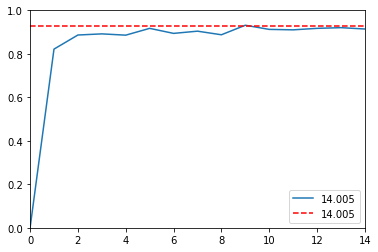

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.935
Validation Accuracy by valid data= 0.864

EPOCH 2...
Validation Accuracy by train data= 0.974
Validation Accuracy by valid data= 0.907

EPOCH 3...
Validation Accuracy by train data= 0.980
Validation Accuracy by valid data= 0.915

EPOCH 4...
Validation Accuracy by train data= 0.972
Validation Accuracy by valid data= 0.906

EPOCH 5...
Validation Accuracy by train data= 0.982
Validation Accuracy by valid data= 0.928

EPOCH 6...
Validation Accuracy by train data= 0.979
Validation Accuracy by valid data= 0.905

EPOCH 7...
Validation Accuracy by train data= 0.982
Validation Accuracy by valid data= 0.907

EPOCH 8...
Validation Accuracy by train data= 0.981
Validation Accuracy by valid data= 0.907

EPOCH 9...
Validation Accuracy by train data= 0.989
Validation Accuracy by valid data= 0.924

EPOCH 10...
Validation Accuracy by train data= 0.985
Validation Accuracy by valid data= 0.905

EPOCH 11...
Validation Accuracy by

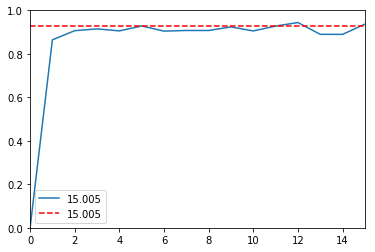

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.912
Validation Accuracy by valid data= 0.826

EPOCH 2...
Validation Accuracy by train data= 0.967
Validation Accuracy by valid data= 0.875

EPOCH 3...
Validation Accuracy by train data= 0.985
Validation Accuracy by valid data= 0.910

EPOCH 4...
Validation Accuracy by train data= 0.985
Validation Accuracy by valid data= 0.912

EPOCH 5...
Validation Accuracy by train data= 0.989
Validation Accuracy by valid data= 0.916

EPOCH 6...
Validation Accuracy by train data= 0.989
Validation Accuracy by valid data= 0.916

EPOCH 7...
Validation Accuracy by train data= 0.983
Validation Accuracy by valid data= 0.910

EPOCH 8...
Validation Accuracy by train data= 0.982
Validation Accuracy by valid data= 0.907

EPOCH 9...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.922

EPOCH 10...
Validation Accuracy by train data= 0.994
Validation Accuracy by valid data= 0.926

EPOCH 11...
Validation Accuracy by

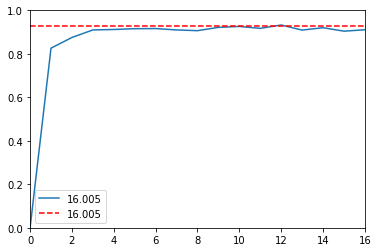

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.942
Validation Accuracy by valid data= 0.871

EPOCH 2...
Validation Accuracy by train data= 0.982
Validation Accuracy by valid data= 0.899

EPOCH 3...
Validation Accuracy by train data= 0.977
Validation Accuracy by valid data= 0.871

EPOCH 4...
Validation Accuracy by train data= 0.987
Validation Accuracy by valid data= 0.905

EPOCH 5...
Validation Accuracy by train data= 0.977
Validation Accuracy by valid data= 0.885

EPOCH 6...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.918

EPOCH 7...
Validation Accuracy by train data= 0.961
Validation Accuracy by valid data= 0.876

EPOCH 8...
Validation Accuracy by train data= 0.985
Validation Accuracy by valid data= 0.917

EPOCH 9...
Validation Accuracy by train data= 0.987
Validation Accuracy by valid data= 0.895

EPOCH 10...
Validation Accuracy by train data= 0.984
Validation Accuracy by valid data= 0.901

EPOCH 11...
Validation Accuracy by

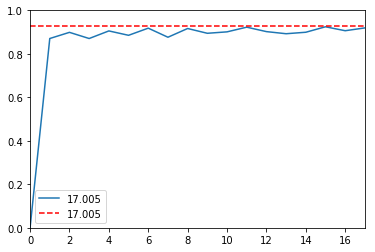

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.924
Validation Accuracy by valid data= 0.832

EPOCH 2...
Validation Accuracy by train data= 0.967
Validation Accuracy by valid data= 0.866

EPOCH 3...
Validation Accuracy by train data= 0.981
Validation Accuracy by valid data= 0.908

EPOCH 4...
Validation Accuracy by train data= 0.981
Validation Accuracy by valid data= 0.885

EPOCH 5...
Validation Accuracy by train data= 0.979
Validation Accuracy by valid data= 0.884

EPOCH 6...
Validation Accuracy by train data= 0.984
Validation Accuracy by valid data= 0.873

EPOCH 7...
Validation Accuracy by train data= 0.981
Validation Accuracy by valid data= 0.894

EPOCH 8...
Validation Accuracy by train data= 0.989
Validation Accuracy by valid data= 0.910

EPOCH 9...
Validation Accuracy by train data= 0.980
Validation Accuracy by valid data= 0.874

EPOCH 10...
Validation Accuracy by train data= 0.993
Validation Accuracy by valid data= 0.899

EPOCH 11...
Validation Accuracy by

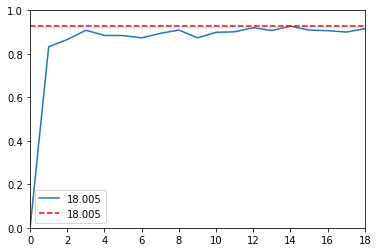

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.950
Validation Accuracy by valid data= 0.878

EPOCH 2...
Validation Accuracy by train data= 0.974
Validation Accuracy by valid data= 0.898

EPOCH 3...
Validation Accuracy by train data= 0.981
Validation Accuracy by valid data= 0.899

EPOCH 4...
Validation Accuracy by train data= 0.967
Validation Accuracy by valid data= 0.869

EPOCH 5...
Validation Accuracy by train data= 0.987
Validation Accuracy by valid data= 0.906

EPOCH 6...
Validation Accuracy by train data= 0.966
Validation Accuracy by valid data= 0.890

EPOCH 7...
Validation Accuracy by train data= 0.977
Validation Accuracy by valid data= 0.889

EPOCH 8...
Validation Accuracy by train data= 0.990
Validation Accuracy by valid data= 0.912

EPOCH 9...
Validation Accuracy by train data= 0.987
Validation Accuracy by valid data= 0.903

EPOCH 10...
Validation Accuracy by train data= 0.976
Validation Accuracy by valid data= 0.884

EPOCH 11...
Validation Accuracy by

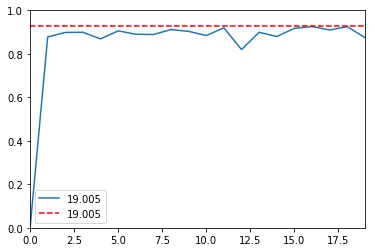

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.934
Validation Accuracy by valid data= 0.880

EPOCH 2...
Validation Accuracy by train data= 0.965
Validation Accuracy by valid data= 0.878

EPOCH 3...
Validation Accuracy by train data= 0.971
Validation Accuracy by valid data= 0.883

EPOCH 4...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.921

EPOCH 5...
Validation Accuracy by train data= 0.973
Validation Accuracy by valid data= 0.881

EPOCH 6...
Validation Accuracy by train data= 0.983
Validation Accuracy by valid data= 0.903

EPOCH 7...
Validation Accuracy by train data= 0.980
Validation Accuracy by valid data= 0.902

EPOCH 8...
Validation Accuracy by train data= 0.987
Validation Accuracy by valid data= 0.892

EPOCH 9...
Validation Accuracy by train data= 0.987
Validation Accuracy by valid data= 0.916

EPOCH 10...
Validation Accuracy by train data= 0.978
Validation Accuracy by valid data= 0.810



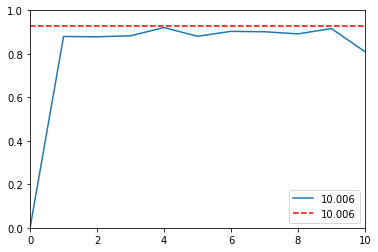

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.942
Validation Accuracy by valid data= 0.850

EPOCH 2...
Validation Accuracy by train data= 0.969
Validation Accuracy by valid data= 0.845

EPOCH 3...
Validation Accuracy by train data= 0.975
Validation Accuracy by valid data= 0.864

EPOCH 4...
Validation Accuracy by train data= 0.983
Validation Accuracy by valid data= 0.890

EPOCH 5...
Validation Accuracy by train data= 0.974
Validation Accuracy by valid data= 0.863

EPOCH 6...
Validation Accuracy by train data= 0.989
Validation Accuracy by valid data= 0.909

EPOCH 7...
Validation Accuracy by train data= 0.989
Validation Accuracy by valid data= 0.890

EPOCH 8...
Validation Accuracy by train data= 0.984
Validation Accuracy by valid data= 0.876

EPOCH 9...
Validation Accuracy by train data= 0.991
Validation Accuracy by valid data= 0.898

EPOCH 10...
Validation Accuracy by train data= 0.990
Validation Accuracy by valid data= 0.909

EPOCH 11...
Validation Accuracy by

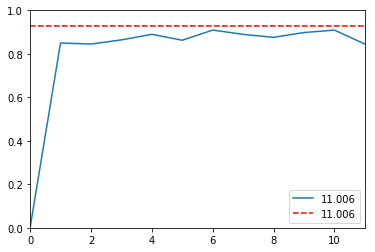

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.949
Validation Accuracy by valid data= 0.872

EPOCH 2...
Validation Accuracy by train data= 0.961
Validation Accuracy by valid data= 0.875

EPOCH 3...
Validation Accuracy by train data= 0.978
Validation Accuracy by valid data= 0.900

EPOCH 4...
Validation Accuracy by train data= 0.983
Validation Accuracy by valid data= 0.912

EPOCH 5...
Validation Accuracy by train data= 0.979
Validation Accuracy by valid data= 0.913

EPOCH 6...
Validation Accuracy by train data= 0.982
Validation Accuracy by valid data= 0.901

EPOCH 7...
Validation Accuracy by train data= 0.989
Validation Accuracy by valid data= 0.912

EPOCH 8...
Validation Accuracy by train data= 0.981
Validation Accuracy by valid data= 0.916

EPOCH 9...
Validation Accuracy by train data= 0.987
Validation Accuracy by valid data= 0.911

EPOCH 10...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.926

EPOCH 11...
Validation Accuracy by

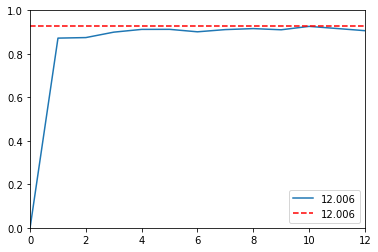

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.941
Validation Accuracy by valid data= 0.887

EPOCH 2...
Validation Accuracy by train data= 0.973
Validation Accuracy by valid data= 0.901

EPOCH 3...
Validation Accuracy by train data= 0.974
Validation Accuracy by valid data= 0.898

EPOCH 4...
Validation Accuracy by train data= 0.980
Validation Accuracy by valid data= 0.879

EPOCH 5...
Validation Accuracy by train data= 0.981
Validation Accuracy by valid data= 0.892

EPOCH 6...
Validation Accuracy by train data= 0.977
Validation Accuracy by valid data= 0.889

EPOCH 7...
Validation Accuracy by train data= 0.978
Validation Accuracy by valid data= 0.885

EPOCH 8...
Validation Accuracy by train data= 0.990
Validation Accuracy by valid data= 0.930

EPOCH 9...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.905

EPOCH 10...
Validation Accuracy by train data= 0.976
Validation Accuracy by valid data= 0.916

EPOCH 11...
Validation Accuracy by

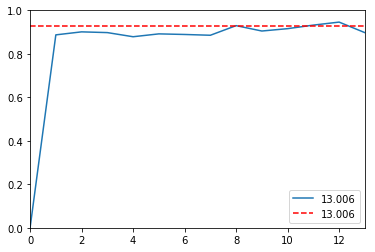

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.932
Validation Accuracy by valid data= 0.840

EPOCH 2...
Validation Accuracy by train data= 0.967
Validation Accuracy by valid data= 0.891

EPOCH 3...
Validation Accuracy by train data= 0.977
Validation Accuracy by valid data= 0.915

EPOCH 4...
Validation Accuracy by train data= 0.975
Validation Accuracy by valid data= 0.889

EPOCH 5...
Validation Accuracy by train data= 0.984
Validation Accuracy by valid data= 0.913

EPOCH 6...
Validation Accuracy by train data= 0.966
Validation Accuracy by valid data= 0.898

EPOCH 7...
Validation Accuracy by train data= 0.984
Validation Accuracy by valid data= 0.918

EPOCH 8...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.918

EPOCH 9...
Validation Accuracy by train data= 0.983
Validation Accuracy by valid data= 0.904

EPOCH 10...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.904

EPOCH 11...
Validation Accuracy by

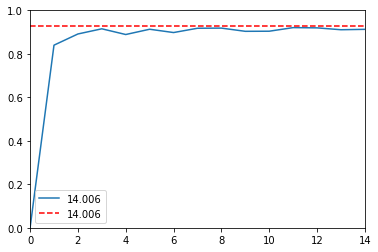

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.937
Validation Accuracy by valid data= 0.827

EPOCH 2...
Validation Accuracy by train data= 0.974
Validation Accuracy by valid data= 0.923

EPOCH 3...
Validation Accuracy by train data= 0.954
Validation Accuracy by valid data= 0.843

EPOCH 4...
Validation Accuracy by train data= 0.978
Validation Accuracy by valid data= 0.897

EPOCH 5...
Validation Accuracy by train data= 0.981
Validation Accuracy by valid data= 0.904

EPOCH 6...
Validation Accuracy by train data= 0.985
Validation Accuracy by valid data= 0.904

EPOCH 7...
Validation Accuracy by train data= 0.981
Validation Accuracy by valid data= 0.889

EPOCH 8...
Validation Accuracy by train data= 0.987
Validation Accuracy by valid data= 0.919

EPOCH 9...
Validation Accuracy by train data= 0.972
Validation Accuracy by valid data= 0.876

EPOCH 10...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.917

EPOCH 11...
Validation Accuracy by

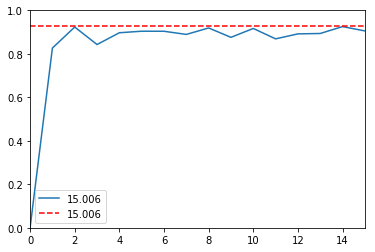

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.937
Validation Accuracy by valid data= 0.827

EPOCH 2...
Validation Accuracy by train data= 0.966
Validation Accuracy by valid data= 0.858

EPOCH 3...
Validation Accuracy by train data= 0.979
Validation Accuracy by valid data= 0.836

EPOCH 4...
Validation Accuracy by train data= 0.978
Validation Accuracy by valid data= 0.858

EPOCH 5...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.893

EPOCH 6...
Validation Accuracy by train data= 0.966
Validation Accuracy by valid data= 0.876

EPOCH 7...
Validation Accuracy by train data= 0.985
Validation Accuracy by valid data= 0.873

EPOCH 8...
Validation Accuracy by train data= 0.980
Validation Accuracy by valid data= 0.809

EPOCH 9...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.862

EPOCH 10...
Validation Accuracy by train data= 0.984
Validation Accuracy by valid data= 0.793

EPOCH 11...
Validation Accuracy by

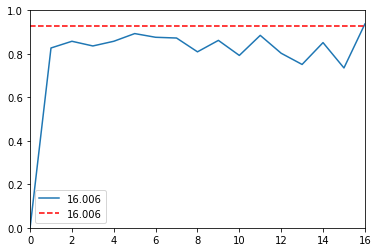

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.937
Validation Accuracy by valid data= 0.839

EPOCH 2...
Validation Accuracy by train data= 0.957
Validation Accuracy by valid data= 0.849

EPOCH 3...
Validation Accuracy by train data= 0.977
Validation Accuracy by valid data= 0.882

EPOCH 4...
Validation Accuracy by train data= 0.979
Validation Accuracy by valid data= 0.905

EPOCH 5...
Validation Accuracy by train data= 0.976
Validation Accuracy by valid data= 0.860

EPOCH 6...
Validation Accuracy by train data= 0.972
Validation Accuracy by valid data= 0.858

EPOCH 7...
Validation Accuracy by train data= 0.976
Validation Accuracy by valid data= 0.900

EPOCH 8...
Validation Accuracy by train data= 0.978
Validation Accuracy by valid data= 0.886

EPOCH 9...
Validation Accuracy by train data= 0.985
Validation Accuracy by valid data= 0.891

EPOCH 10...
Validation Accuracy by train data= 0.976
Validation Accuracy by valid data= 0.913

EPOCH 11...
Validation Accuracy by

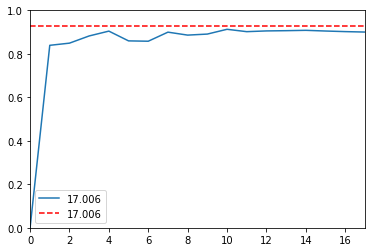

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.943
Validation Accuracy by valid data= 0.891

EPOCH 2...
Validation Accuracy by train data= 0.970
Validation Accuracy by valid data= 0.904

EPOCH 3...
Validation Accuracy by train data= 0.978
Validation Accuracy by valid data= 0.884

EPOCH 4...
Validation Accuracy by train data= 0.973
Validation Accuracy by valid data= 0.877

EPOCH 5...
Validation Accuracy by train data= 0.982
Validation Accuracy by valid data= 0.913

EPOCH 6...
Validation Accuracy by train data= 0.981
Validation Accuracy by valid data= 0.906

EPOCH 7...
Validation Accuracy by train data= 0.984
Validation Accuracy by valid data= 0.911

EPOCH 8...
Validation Accuracy by train data= 0.987
Validation Accuracy by valid data= 0.915

EPOCH 9...
Validation Accuracy by train data= 0.969
Validation Accuracy by valid data= 0.867

EPOCH 10...
Validation Accuracy by train data= 0.982
Validation Accuracy by valid data= 0.906

EPOCH 11...
Validation Accuracy by

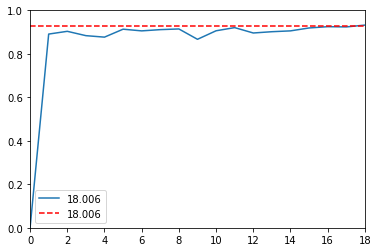

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.951
Validation Accuracy by valid data= 0.866

EPOCH 2...
Validation Accuracy by train data= 0.965
Validation Accuracy by valid data= 0.888

EPOCH 3...
Validation Accuracy by train data= 0.973
Validation Accuracy by valid data= 0.910

EPOCH 4...
Validation Accuracy by train data= 0.980
Validation Accuracy by valid data= 0.898

EPOCH 5...
Validation Accuracy by train data= 0.975
Validation Accuracy by valid data= 0.897

EPOCH 6...
Validation Accuracy by train data= 0.971
Validation Accuracy by valid data= 0.870

EPOCH 7...
Validation Accuracy by train data= 0.976
Validation Accuracy by valid data= 0.889

EPOCH 8...
Validation Accuracy by train data= 0.978
Validation Accuracy by valid data= 0.865

EPOCH 9...
Validation Accuracy by train data= 0.983
Validation Accuracy by valid data= 0.893

EPOCH 10...
Validation Accuracy by train data= 0.982
Validation Accuracy by valid data= 0.882

EPOCH 11...
Validation Accuracy by

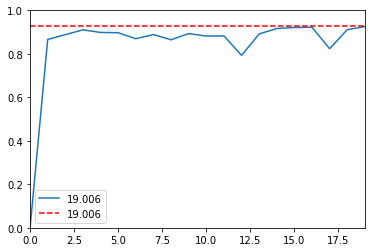

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.953
Validation Accuracy by valid data= 0.871

EPOCH 2...
Validation Accuracy by train data= 0.963
Validation Accuracy by valid data= 0.871

EPOCH 3...
Validation Accuracy by train data= 0.974
Validation Accuracy by valid data= 0.890

EPOCH 4...
Validation Accuracy by train data= 0.971
Validation Accuracy by valid data= 0.822

EPOCH 5...
Validation Accuracy by train data= 0.977
Validation Accuracy by valid data= 0.897

EPOCH 6...
Validation Accuracy by train data= 0.979
Validation Accuracy by valid data= 0.870

EPOCH 7...
Validation Accuracy by train data= 0.971
Validation Accuracy by valid data= 0.885

EPOCH 8...
Validation Accuracy by train data= 0.981
Validation Accuracy by valid data= 0.909

EPOCH 9...
Validation Accuracy by train data= 0.968
Validation Accuracy by valid data= 0.862

EPOCH 10...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.892



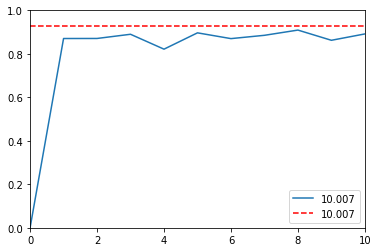

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.942
Validation Accuracy by valid data= 0.864

EPOCH 2...
Validation Accuracy by train data= 0.971
Validation Accuracy by valid data= 0.895

EPOCH 3...
Validation Accuracy by train data= 0.962
Validation Accuracy by valid data= 0.877

EPOCH 4...
Validation Accuracy by train data= 0.976
Validation Accuracy by valid data= 0.914

EPOCH 5...
Validation Accuracy by train data= 0.981
Validation Accuracy by valid data= 0.894

EPOCH 6...
Validation Accuracy by train data= 0.982
Validation Accuracy by valid data= 0.892

EPOCH 7...
Validation Accuracy by train data= 0.972
Validation Accuracy by valid data= 0.914

EPOCH 8...
Validation Accuracy by train data= 0.980
Validation Accuracy by valid data= 0.906

EPOCH 9...
Validation Accuracy by train data= 0.985
Validation Accuracy by valid data= 0.917

EPOCH 10...
Validation Accuracy by train data= 0.987
Validation Accuracy by valid data= 0.917

EPOCH 11...
Validation Accuracy by

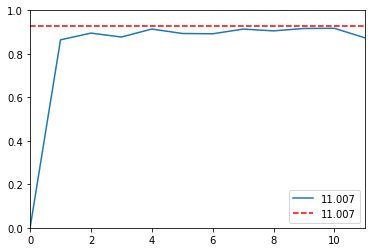

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.948
Validation Accuracy by valid data= 0.877

EPOCH 2...
Validation Accuracy by train data= 0.970
Validation Accuracy by valid data= 0.910

EPOCH 3...
Validation Accuracy by train data= 0.976
Validation Accuracy by valid data= 0.883

EPOCH 4...
Validation Accuracy by train data= 0.977
Validation Accuracy by valid data= 0.901

EPOCH 5...
Validation Accuracy by train data= 0.974
Validation Accuracy by valid data= 0.868

EPOCH 6...
Validation Accuracy by train data= 0.975
Validation Accuracy by valid data= 0.882

EPOCH 7...
Validation Accuracy by train data= 0.949
Validation Accuracy by valid data= 0.872

EPOCH 8...
Validation Accuracy by train data= 0.989
Validation Accuracy by valid data= 0.910

EPOCH 9...
Validation Accuracy by train data= 0.978
Validation Accuracy by valid data= 0.874

EPOCH 10...
Validation Accuracy by train data= 0.980
Validation Accuracy by valid data= 0.888

EPOCH 11...
Validation Accuracy by

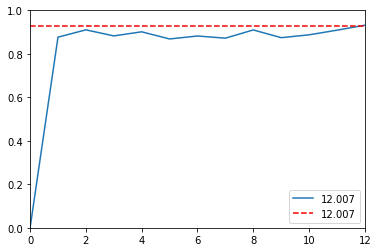

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.941
Validation Accuracy by valid data= 0.870

EPOCH 2...
Validation Accuracy by train data= 0.973
Validation Accuracy by valid data= 0.906

EPOCH 3...
Validation Accuracy by train data= 0.969
Validation Accuracy by valid data= 0.879

EPOCH 4...
Validation Accuracy by train data= 0.980
Validation Accuracy by valid data= 0.896

EPOCH 5...
Validation Accuracy by train data= 0.975
Validation Accuracy by valid data= 0.851

EPOCH 6...
Validation Accuracy by train data= 0.983
Validation Accuracy by valid data= 0.930

EPOCH 7...
Validation Accuracy by train data= 0.983
Validation Accuracy by valid data= 0.897

EPOCH 8...
Validation Accuracy by train data= 0.983
Validation Accuracy by valid data= 0.888

EPOCH 9...
Validation Accuracy by train data= 0.980
Validation Accuracy by valid data= 0.868

EPOCH 10...
Validation Accuracy by train data= 0.984
Validation Accuracy by valid data= 0.854

EPOCH 11...
Validation Accuracy by

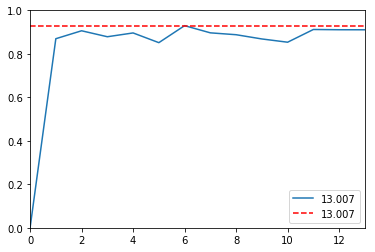

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.960
Validation Accuracy by valid data= 0.859

EPOCH 2...
Validation Accuracy by train data= 0.965
Validation Accuracy by valid data= 0.880

EPOCH 3...
Validation Accuracy by train data= 0.979
Validation Accuracy by valid data= 0.867

EPOCH 4...
Validation Accuracy by train data= 0.981
Validation Accuracy by valid data= 0.871

EPOCH 5...
Validation Accuracy by train data= 0.981
Validation Accuracy by valid data= 0.881

EPOCH 6...
Validation Accuracy by train data= 0.977
Validation Accuracy by valid data= 0.840

EPOCH 7...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.902

EPOCH 8...
Validation Accuracy by train data= 0.971
Validation Accuracy by valid data= 0.855

EPOCH 9...
Validation Accuracy by train data= 0.990
Validation Accuracy by valid data= 0.893

EPOCH 10...
Validation Accuracy by train data= 0.977
Validation Accuracy by valid data= 0.910

EPOCH 11...
Validation Accuracy by

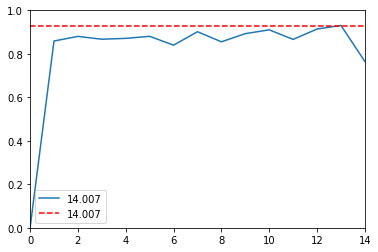

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.949
Validation Accuracy by valid data= 0.885

EPOCH 2...
Validation Accuracy by train data= 0.971
Validation Accuracy by valid data= 0.887

EPOCH 3...
Validation Accuracy by train data= 0.966
Validation Accuracy by valid data= 0.884

EPOCH 4...
Validation Accuracy by train data= 0.972
Validation Accuracy by valid data= 0.899

EPOCH 5...
Validation Accuracy by train data= 0.985
Validation Accuracy by valid data= 0.901

EPOCH 6...
Validation Accuracy by train data= 0.977
Validation Accuracy by valid data= 0.906

EPOCH 7...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.913

EPOCH 8...
Validation Accuracy by train data= 0.981
Validation Accuracy by valid data= 0.897

EPOCH 9...
Validation Accuracy by train data= 0.987
Validation Accuracy by valid data= 0.927

EPOCH 10...
Validation Accuracy by train data= 0.983
Validation Accuracy by valid data= 0.891

EPOCH 11...
Validation Accuracy by

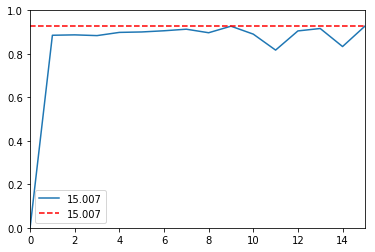

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.947
Validation Accuracy by valid data= 0.876

EPOCH 2...
Validation Accuracy by train data= 0.976
Validation Accuracy by valid data= 0.909

EPOCH 3...
Validation Accuracy by train data= 0.957
Validation Accuracy by valid data= 0.884

EPOCH 4...
Validation Accuracy by train data= 0.974
Validation Accuracy by valid data= 0.889

EPOCH 5...
Validation Accuracy by train data= 0.967
Validation Accuracy by valid data= 0.881

EPOCH 6...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.921

EPOCH 7...
Validation Accuracy by train data= 0.986
Validation Accuracy by valid data= 0.909

EPOCH 8...
Validation Accuracy by train data= 0.982
Validation Accuracy by valid data= 0.908

EPOCH 9...
Validation Accuracy by train data= 0.982
Validation Accuracy by valid data= 0.926

EPOCH 10...
Validation Accuracy by train data= 0.983
Validation Accuracy by valid data= 0.923

EPOCH 11...
Validation Accuracy by

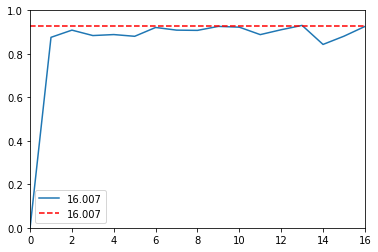

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.945
Validation Accuracy by valid data= 0.866

EPOCH 2...
Validation Accuracy by train data= 0.968
Validation Accuracy by valid data= 0.808

EPOCH 3...
Validation Accuracy by train data= 0.972
Validation Accuracy by valid data= 0.888

EPOCH 4...
Validation Accuracy by train data= 0.977
Validation Accuracy by valid data= 0.881

EPOCH 5...
Validation Accuracy by train data= 0.981
Validation Accuracy by valid data= 0.839

EPOCH 6...
Validation Accuracy by train data= 0.984
Validation Accuracy by valid data= 0.862

EPOCH 7...
Validation Accuracy by train data= 0.981
Validation Accuracy by valid data= 0.888

EPOCH 8...
Validation Accuracy by train data= 0.978
Validation Accuracy by valid data= 0.928

EPOCH 9...
Validation Accuracy by train data= 0.983
Validation Accuracy by valid data= 0.811

EPOCH 10...
Validation Accuracy by train data= 0.967
Validation Accuracy by valid data= 0.759

EPOCH 11...
Validation Accuracy by

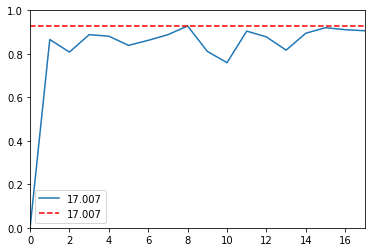

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.945
Validation Accuracy by valid data= 0.881

EPOCH 2...
Validation Accuracy by train data= 0.958
Validation Accuracy by valid data= 0.869

EPOCH 3...
Validation Accuracy by train data= 0.979
Validation Accuracy by valid data= 0.884

EPOCH 4...
Validation Accuracy by train data= 0.973
Validation Accuracy by valid data= 0.895

EPOCH 5...
Validation Accuracy by train data= 0.979
Validation Accuracy by valid data= 0.894

EPOCH 6...
Validation Accuracy by train data= 0.977
Validation Accuracy by valid data= 0.881

EPOCH 7...
Validation Accuracy by train data= 0.969
Validation Accuracy by valid data= 0.870

EPOCH 8...
Validation Accuracy by train data= 0.988
Validation Accuracy by valid data= 0.903

EPOCH 9...
Validation Accuracy by train data= 0.978
Validation Accuracy by valid data= 0.882

EPOCH 10...
Validation Accuracy by train data= 0.985
Validation Accuracy by valid data= 0.893

EPOCH 11...
Validation Accuracy by

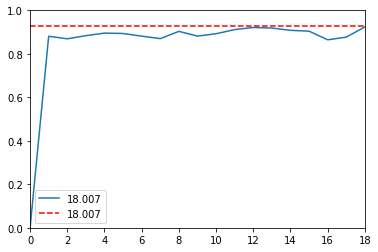

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.928
Validation Accuracy by valid data= 0.816

EPOCH 2...
Validation Accuracy by train data= 0.952
Validation Accuracy by valid data= 0.828

EPOCH 3...
Validation Accuracy by train data= 0.970
Validation Accuracy by valid data= 0.873

EPOCH 4...
Validation Accuracy by train data= 0.984
Validation Accuracy by valid data= 0.902

EPOCH 5...
Validation Accuracy by train data= 0.968
Validation Accuracy by valid data= 0.841

EPOCH 6...
Validation Accuracy by train data= 0.980
Validation Accuracy by valid data= 0.919

EPOCH 7...
Validation Accuracy by train data= 0.964
Validation Accuracy by valid data= 0.878

EPOCH 8...
Validation Accuracy by train data= 0.982
Validation Accuracy by valid data= 0.856

EPOCH 9...
Validation Accuracy by train data= 0.979
Validation Accuracy by valid data= 0.903

EPOCH 10...
Validation Accuracy by train data= 0.972
Validation Accuracy by valid data= 0.877

EPOCH 11...
Validation Accuracy by

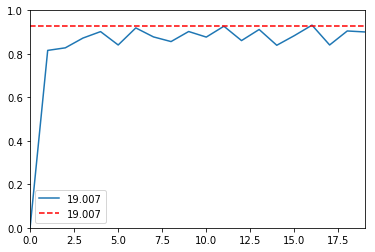

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.918
Validation Accuracy by valid data= 0.846

EPOCH 2...
Validation Accuracy by train data= 0.956
Validation Accuracy by valid data= 0.865

EPOCH 3...
Validation Accuracy by train data= 0.974
Validation Accuracy by valid data= 0.873

EPOCH 4...
Validation Accuracy by train data= 0.971
Validation Accuracy by valid data= 0.894

EPOCH 5...
Validation Accuracy by train data= 0.972
Validation Accuracy by valid data= 0.877

EPOCH 6...
Validation Accuracy by train data= 0.972
Validation Accuracy by valid data= 0.888

EPOCH 7...
Validation Accuracy by train data= 0.959
Validation Accuracy by valid data= 0.888

EPOCH 8...
Validation Accuracy by train data= 0.973
Validation Accuracy by valid data= 0.864

EPOCH 9...
Validation Accuracy by train data= 0.954
Validation Accuracy by valid data= 0.874

EPOCH 10...
Validation Accuracy by train data= 0.956
Validation Accuracy by valid data= 0.799



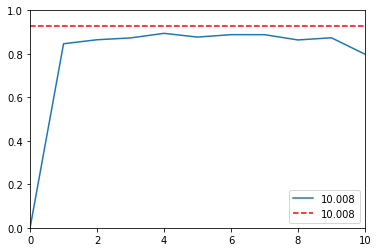

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.938
Validation Accuracy by valid data= 0.850

EPOCH 2...
Validation Accuracy by train data= 0.966
Validation Accuracy by valid data= 0.887

EPOCH 3...
Validation Accuracy by train data= 0.969
Validation Accuracy by valid data= 0.894

EPOCH 4...
Validation Accuracy by train data= 0.950
Validation Accuracy by valid data= 0.856

EPOCH 5...
Validation Accuracy by train data= 0.979
Validation Accuracy by valid data= 0.910

EPOCH 6...
Validation Accuracy by train data= 0.980
Validation Accuracy by valid data= 0.901

EPOCH 7...
Validation Accuracy by train data= 0.968
Validation Accuracy by valid data= 0.754

EPOCH 8...
Validation Accuracy by train data= 0.972
Validation Accuracy by valid data= 0.642

EPOCH 9...
Validation Accuracy by train data= 0.978
Validation Accuracy by valid data= 0.800

EPOCH 10...
Validation Accuracy by train data= 0.976
Validation Accuracy by valid data= 0.901

EPOCH 11...
Validation Accuracy by

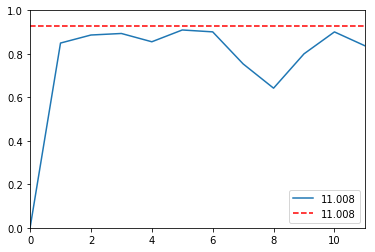

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.944
Validation Accuracy by valid data= 0.894

EPOCH 2...
Validation Accuracy by train data= 0.970
Validation Accuracy by valid data= 0.892

EPOCH 3...
Validation Accuracy by train data= 0.959
Validation Accuracy by valid data= 0.888

EPOCH 4...
Validation Accuracy by train data= 0.968
Validation Accuracy by valid data= 0.897

EPOCH 5...
Validation Accuracy by train data= 0.975
Validation Accuracy by valid data= 0.888

EPOCH 6...
Validation Accuracy by train data= 0.971
Validation Accuracy by valid data= 0.910

EPOCH 7...
Validation Accuracy by train data= 0.971
Validation Accuracy by valid data= 0.889

EPOCH 8...
Validation Accuracy by train data= 0.979
Validation Accuracy by valid data= 0.835

EPOCH 9...
Validation Accuracy by train data= 0.985
Validation Accuracy by valid data= 0.894

EPOCH 10...
Validation Accuracy by train data= 0.981
Validation Accuracy by valid data= 0.899

EPOCH 11...
Validation Accuracy by

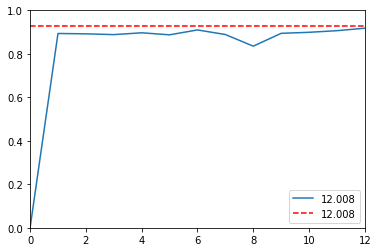

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.935
Validation Accuracy by valid data= 0.845

EPOCH 2...
Validation Accuracy by train data= 0.967
Validation Accuracy by valid data= 0.886

EPOCH 3...
Validation Accuracy by train data= 0.965
Validation Accuracy by valid data= 0.856

EPOCH 4...
Validation Accuracy by train data= 0.976
Validation Accuracy by valid data= 0.863

EPOCH 5...
Validation Accuracy by train data= 0.945
Validation Accuracy by valid data= 0.685

EPOCH 6...
Validation Accuracy by train data= 0.962
Validation Accuracy by valid data= 0.868

EPOCH 7...
Validation Accuracy by train data= 0.971
Validation Accuracy by valid data= 0.846

EPOCH 8...
Validation Accuracy by train data= 0.971
Validation Accuracy by valid data= 0.854

EPOCH 9...
Validation Accuracy by train data= 0.972
Validation Accuracy by valid data= 0.886

EPOCH 10...
Validation Accuracy by train data= 0.966
Validation Accuracy by valid data= 0.847

EPOCH 11...
Validation Accuracy by

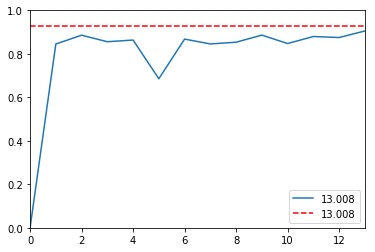

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.935
Validation Accuracy by valid data= 0.852

EPOCH 2...
Validation Accuracy by train data= 0.979
Validation Accuracy by valid data= 0.875

EPOCH 3...
Validation Accuracy by train data= 0.958
Validation Accuracy by valid data= 0.860

EPOCH 4...
Validation Accuracy by train data= 0.976
Validation Accuracy by valid data= 0.874

EPOCH 5...
Validation Accuracy by train data= 0.979
Validation Accuracy by valid data= 0.896

EPOCH 6...
Validation Accuracy by train data= 0.979
Validation Accuracy by valid data= 0.915

EPOCH 7...
Validation Accuracy by train data= 0.979
Validation Accuracy by valid data= 0.919

EPOCH 8...
Validation Accuracy by train data= 0.978
Validation Accuracy by valid data= 0.805

EPOCH 9...
Validation Accuracy by train data= 0.983
Validation Accuracy by valid data= 0.899

EPOCH 10...
Validation Accuracy by train data= 0.979
Validation Accuracy by valid data= 0.902

EPOCH 11...
Validation Accuracy by

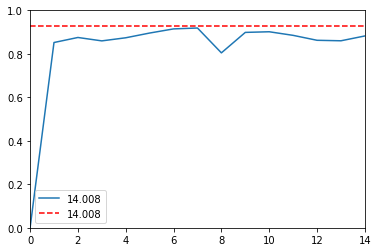

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.942
Validation Accuracy by valid data= 0.845

EPOCH 2...
Validation Accuracy by train data= 0.962
Validation Accuracy by valid data= 0.863

EPOCH 3...
Validation Accuracy by train data= 0.971
Validation Accuracy by valid data= 0.874

EPOCH 4...
Validation Accuracy by train data= 0.974
Validation Accuracy by valid data= 0.897

EPOCH 5...
Validation Accuracy by train data= 0.973
Validation Accuracy by valid data= 0.894

EPOCH 6...
Validation Accuracy by train data= 0.968
Validation Accuracy by valid data= 0.841

EPOCH 7...
Validation Accuracy by train data= 0.975
Validation Accuracy by valid data= 0.829

EPOCH 8...
Validation Accuracy by train data= 0.978
Validation Accuracy by valid data= 0.788

EPOCH 9...
Validation Accuracy by train data= 0.968
Validation Accuracy by valid data= 0.868

EPOCH 10...
Validation Accuracy by train data= 0.985
Validation Accuracy by valid data= 0.901

EPOCH 11...
Validation Accuracy by

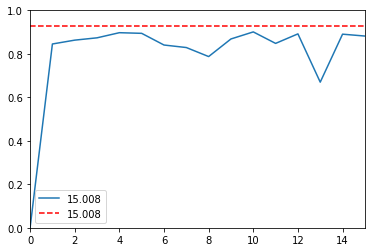

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.930
Validation Accuracy by valid data= 0.839

EPOCH 2...
Validation Accuracy by train data= 0.947
Validation Accuracy by valid data= 0.861

EPOCH 3...
Validation Accuracy by train data= 0.957
Validation Accuracy by valid data= 0.868

EPOCH 4...
Validation Accuracy by train data= 0.968
Validation Accuracy by valid data= 0.863

EPOCH 5...
Validation Accuracy by train data= 0.973
Validation Accuracy by valid data= 0.852

EPOCH 6...
Validation Accuracy by train data= 0.959
Validation Accuracy by valid data= 0.809

EPOCH 7...
Validation Accuracy by train data= 0.981
Validation Accuracy by valid data= 0.883

EPOCH 8...
Validation Accuracy by train data= 0.977
Validation Accuracy by valid data= 0.881

EPOCH 9...
Validation Accuracy by train data= 0.981
Validation Accuracy by valid data= 0.905

EPOCH 10...
Validation Accuracy by train data= 0.972
Validation Accuracy by valid data= 0.885

EPOCH 11...
Validation Accuracy by

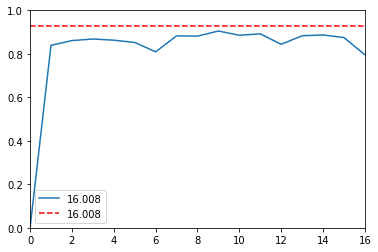

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.933
Validation Accuracy by valid data= 0.832

EPOCH 2...
Validation Accuracy by train data= 0.952
Validation Accuracy by valid data= 0.875

EPOCH 3...
Validation Accuracy by train data= 0.941
Validation Accuracy by valid data= 0.830

EPOCH 4...
Validation Accuracy by train data= 0.967
Validation Accuracy by valid data= 0.887

EPOCH 5...
Validation Accuracy by train data= 0.966
Validation Accuracy by valid data= 0.888

EPOCH 6...
Validation Accuracy by train data= 0.978
Validation Accuracy by valid data= 0.903

EPOCH 7...
Validation Accuracy by train data= 0.980
Validation Accuracy by valid data= 0.899

EPOCH 8...
Validation Accuracy by train data= 0.962
Validation Accuracy by valid data= 0.874

EPOCH 9...
Validation Accuracy by train data= 0.989
Validation Accuracy by valid data= 0.920

EPOCH 10...
Validation Accuracy by train data= 0.969
Validation Accuracy by valid data= 0.862

EPOCH 11...
Validation Accuracy by

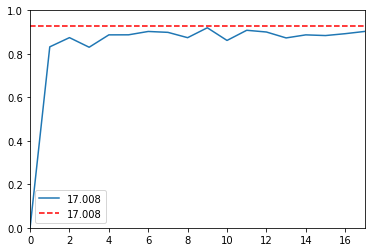

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.952
Validation Accuracy by valid data= 0.871

EPOCH 2...
Validation Accuracy by train data= 0.959
Validation Accuracy by valid data= 0.905

EPOCH 3...
Validation Accuracy by train data= 0.976
Validation Accuracy by valid data= 0.888

EPOCH 4...
Validation Accuracy by train data= 0.975
Validation Accuracy by valid data= 0.864

EPOCH 5...
Validation Accuracy by train data= 0.980
Validation Accuracy by valid data= 0.912

EPOCH 6...
Validation Accuracy by train data= 0.979
Validation Accuracy by valid data= 0.881

EPOCH 7...
Validation Accuracy by train data= 0.969
Validation Accuracy by valid data= 0.845

EPOCH 8...
Validation Accuracy by train data= 0.966
Validation Accuracy by valid data= 0.875

EPOCH 9...
Validation Accuracy by train data= 0.982
Validation Accuracy by valid data= 0.916

EPOCH 10...
Validation Accuracy by train data= 0.980
Validation Accuracy by valid data= 0.900

EPOCH 11...
Validation Accuracy by

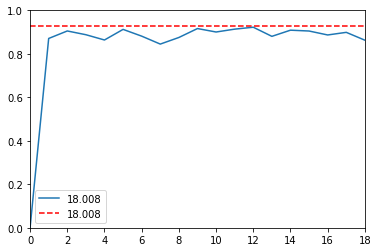

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.914
Validation Accuracy by valid data= 0.829

EPOCH 2...
Validation Accuracy by train data= 0.960
Validation Accuracy by valid data= 0.825

EPOCH 3...
Validation Accuracy by train data= 0.967
Validation Accuracy by valid data= 0.881

EPOCH 4...
Validation Accuracy by train data= 0.974
Validation Accuracy by valid data= 0.888

EPOCH 5...
Validation Accuracy by train data= 0.977
Validation Accuracy by valid data= 0.888

EPOCH 6...
Validation Accuracy by train data= 0.974
Validation Accuracy by valid data= 0.857

EPOCH 7...
Validation Accuracy by train data= 0.958
Validation Accuracy by valid data= 0.898

EPOCH 8...
Validation Accuracy by train data= 0.975
Validation Accuracy by valid data= 0.892

EPOCH 9...
Validation Accuracy by train data= 0.967
Validation Accuracy by valid data= 0.898

EPOCH 10...
Validation Accuracy by train data= 0.982
Validation Accuracy by valid data= 0.918

EPOCH 11...
Validation Accuracy by

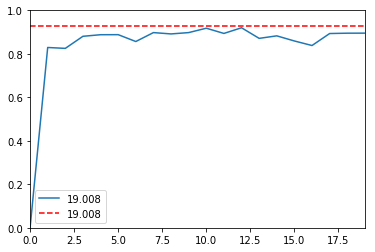

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.932
Validation Accuracy by valid data= 0.871

EPOCH 2...
Validation Accuracy by train data= 0.962
Validation Accuracy by valid data= 0.832

EPOCH 3...
Validation Accuracy by train data= 0.976
Validation Accuracy by valid data= 0.871

EPOCH 4...
Validation Accuracy by train data= 0.975
Validation Accuracy by valid data= 0.800

EPOCH 5...
Validation Accuracy by train data= 0.952
Validation Accuracy by valid data= 0.753

EPOCH 6...
Validation Accuracy by train data= 0.954
Validation Accuracy by valid data= 0.832

EPOCH 7...
Validation Accuracy by train data= 0.937
Validation Accuracy by valid data= 0.842

EPOCH 8...
Validation Accuracy by train data= 0.970
Validation Accuracy by valid data= 0.899

EPOCH 9...
Validation Accuracy by train data= 0.975
Validation Accuracy by valid data= 0.823

EPOCH 10...
Validation Accuracy by train data= 0.969
Validation Accuracy by valid data= 0.828



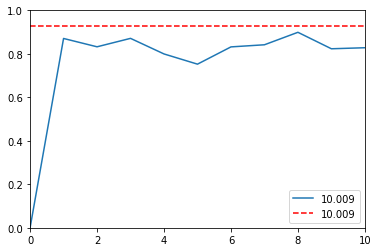

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.933
Validation Accuracy by valid data= 0.803

EPOCH 2...
Validation Accuracy by train data= 0.967
Validation Accuracy by valid data= 0.890

EPOCH 3...
Validation Accuracy by train data= 0.955
Validation Accuracy by valid data= 0.789

EPOCH 4...
Validation Accuracy by train data= 0.961
Validation Accuracy by valid data= 0.901

EPOCH 5...
Validation Accuracy by train data= 0.967
Validation Accuracy by valid data= 0.820

EPOCH 6...
Validation Accuracy by train data= 0.963
Validation Accuracy by valid data= 0.897

EPOCH 7...
Validation Accuracy by train data= 0.975
Validation Accuracy by valid data= 0.864

EPOCH 8...
Validation Accuracy by train data= 0.977
Validation Accuracy by valid data= 0.818

EPOCH 9...
Validation Accuracy by train data= 0.951
Validation Accuracy by valid data= 0.812

EPOCH 10...
Validation Accuracy by train data= 0.946
Validation Accuracy by valid data= 0.874

EPOCH 11...
Validation Accuracy by

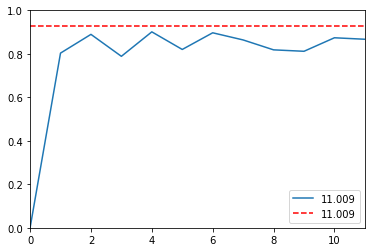

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.938
Validation Accuracy by valid data= 0.876

EPOCH 2...
Validation Accuracy by train data= 0.961
Validation Accuracy by valid data= 0.896

EPOCH 3...
Validation Accuracy by train data= 0.960
Validation Accuracy by valid data= 0.869

EPOCH 4...
Validation Accuracy by train data= 0.964
Validation Accuracy by valid data= 0.892

EPOCH 5...
Validation Accuracy by train data= 0.961
Validation Accuracy by valid data= 0.856

EPOCH 6...
Validation Accuracy by train data= 0.980
Validation Accuracy by valid data= 0.885

EPOCH 7...
Validation Accuracy by train data= 0.969
Validation Accuracy by valid data= 0.887

EPOCH 8...
Validation Accuracy by train data= 0.965
Validation Accuracy by valid data= 0.875

EPOCH 9...
Validation Accuracy by train data= 0.985
Validation Accuracy by valid data= 0.909

EPOCH 10...
Validation Accuracy by train data= 0.972
Validation Accuracy by valid data= 0.881

EPOCH 11...
Validation Accuracy by

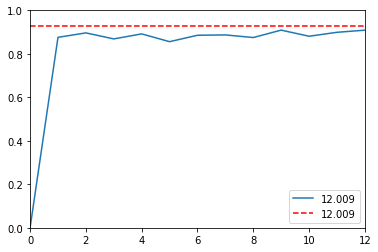

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.942
Validation Accuracy by valid data= 0.801

EPOCH 2...
Validation Accuracy by train data= 0.967
Validation Accuracy by valid data= 0.898

EPOCH 3...
Validation Accuracy by train data= 0.970
Validation Accuracy by valid data= 0.873

EPOCH 4...
Validation Accuracy by train data= 0.972
Validation Accuracy by valid data= 0.847

EPOCH 5...
Validation Accuracy by train data= 0.964
Validation Accuracy by valid data= 0.807

EPOCH 6...
Validation Accuracy by train data= 0.971
Validation Accuracy by valid data= 0.842

EPOCH 7...
Validation Accuracy by train data= 0.973
Validation Accuracy by valid data= 0.928

EPOCH 8...
Validation Accuracy by train data= 0.973
Validation Accuracy by valid data= 0.910

EPOCH 9...
Validation Accuracy by train data= 0.957
Validation Accuracy by valid data= 0.887

EPOCH 10...
Validation Accuracy by train data= 0.964
Validation Accuracy by valid data= 0.835

EPOCH 11...
Validation Accuracy by

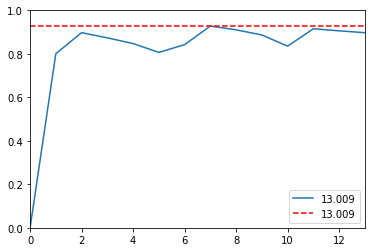

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.946
Validation Accuracy by valid data= 0.852

EPOCH 2...
Validation Accuracy by train data= 0.954
Validation Accuracy by valid data= 0.884

EPOCH 3...
Validation Accuracy by train data= 0.950
Validation Accuracy by valid data= 0.854

EPOCH 4...
Validation Accuracy by train data= 0.965
Validation Accuracy by valid data= 0.859

EPOCH 5...
Validation Accuracy by train data= 0.976
Validation Accuracy by valid data= 0.904

EPOCH 6...
Validation Accuracy by train data= 0.971
Validation Accuracy by valid data= 0.887

EPOCH 7...
Validation Accuracy by train data= 0.939
Validation Accuracy by valid data= 0.714

EPOCH 8...
Validation Accuracy by train data= 0.960
Validation Accuracy by valid data= 0.775

EPOCH 9...
Validation Accuracy by train data= 0.978
Validation Accuracy by valid data= 0.894

EPOCH 10...
Validation Accuracy by train data= 0.974
Validation Accuracy by valid data= 0.902

EPOCH 11...
Validation Accuracy by

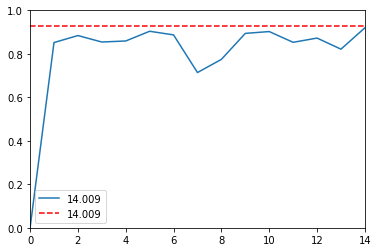

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.934
Validation Accuracy by valid data= 0.839

EPOCH 2...
Validation Accuracy by train data= 0.947
Validation Accuracy by valid data= 0.837

EPOCH 3...
Validation Accuracy by train data= 0.966
Validation Accuracy by valid data= 0.880

EPOCH 4...
Validation Accuracy by train data= 0.950
Validation Accuracy by valid data= 0.867

EPOCH 5...
Validation Accuracy by train data= 0.930
Validation Accuracy by valid data= 0.681

EPOCH 6...
Validation Accuracy by train data= 0.961
Validation Accuracy by valid data= 0.879

EPOCH 7...
Validation Accuracy by train data= 0.972
Validation Accuracy by valid data= 0.897

EPOCH 8...
Validation Accuracy by train data= 0.978
Validation Accuracy by valid data= 0.894

EPOCH 9...
Validation Accuracy by train data= 0.973
Validation Accuracy by valid data= 0.862

EPOCH 10...
Validation Accuracy by train data= 0.979
Validation Accuracy by valid data= 0.911

EPOCH 11...
Validation Accuracy by

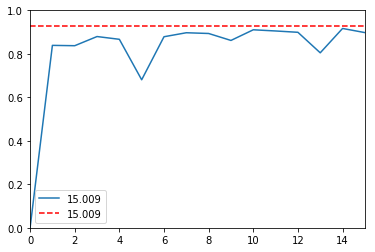

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.917
Validation Accuracy by valid data= 0.822

EPOCH 2...
Validation Accuracy by train data= 0.971
Validation Accuracy by valid data= 0.881

EPOCH 3...
Validation Accuracy by train data= 0.962
Validation Accuracy by valid data= 0.885

EPOCH 4...
Validation Accuracy by train data= 0.966
Validation Accuracy by valid data= 0.884

EPOCH 5...
Validation Accuracy by train data= 0.960
Validation Accuracy by valid data= 0.840

EPOCH 6...
Validation Accuracy by train data= 0.980
Validation Accuracy by valid data= 0.904

EPOCH 7...
Validation Accuracy by train data= 0.978
Validation Accuracy by valid data= 0.888

EPOCH 8...
Validation Accuracy by train data= 0.958
Validation Accuracy by valid data= 0.885

EPOCH 9...
Validation Accuracy by train data= 0.960
Validation Accuracy by valid data= 0.892

EPOCH 10...
Validation Accuracy by train data= 0.973
Validation Accuracy by valid data= 0.894

EPOCH 11...
Validation Accuracy by

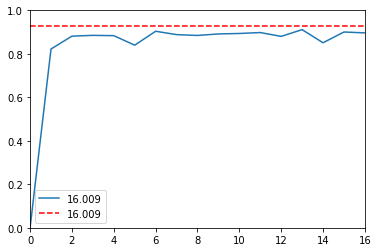

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.935
Validation Accuracy by valid data= 0.740

EPOCH 2...
Validation Accuracy by train data= 0.951
Validation Accuracy by valid data= 0.824

EPOCH 3...
Validation Accuracy by train data= 0.956
Validation Accuracy by valid data= 0.870

EPOCH 4...
Validation Accuracy by train data= 0.978
Validation Accuracy by valid data= 0.866

EPOCH 5...
Validation Accuracy by train data= 0.971
Validation Accuracy by valid data= 0.871

EPOCH 6...
Validation Accuracy by train data= 0.968
Validation Accuracy by valid data= 0.889

EPOCH 7...
Validation Accuracy by train data= 0.980
Validation Accuracy by valid data= 0.894

EPOCH 8...
Validation Accuracy by train data= 0.964
Validation Accuracy by valid data= 0.864

EPOCH 9...
Validation Accuracy by train data= 0.952
Validation Accuracy by valid data= 0.810

EPOCH 10...
Validation Accuracy by train data= 0.976
Validation Accuracy by valid data= 0.908

EPOCH 11...
Validation Accuracy by

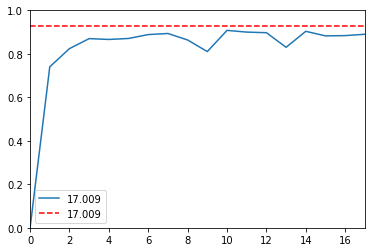

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.933
Validation Accuracy by valid data= 0.840

EPOCH 2...
Validation Accuracy by train data= 0.965
Validation Accuracy by valid data= 0.887

EPOCH 3...
Validation Accuracy by train data= 0.978
Validation Accuracy by valid data= 0.871

EPOCH 4...
Validation Accuracy by train data= 0.978
Validation Accuracy by valid data= 0.885

EPOCH 5...
Validation Accuracy by train data= 0.955
Validation Accuracy by valid data= 0.875

EPOCH 6...
Validation Accuracy by train data= 0.976
Validation Accuracy by valid data= 0.876

EPOCH 7...
Validation Accuracy by train data= 0.951
Validation Accuracy by valid data= 0.830

EPOCH 8...
Validation Accuracy by train data= 0.982
Validation Accuracy by valid data= 0.816

EPOCH 9...
Validation Accuracy by train data= 0.980
Validation Accuracy by valid data= 0.902

EPOCH 10...
Validation Accuracy by train data= 0.963
Validation Accuracy by valid data= 0.861

EPOCH 11...
Validation Accuracy by

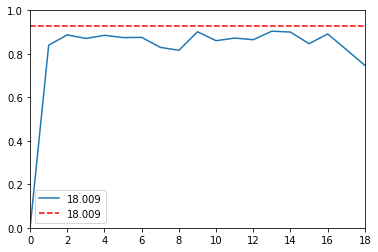

Model saved
Training...

EPOCH 1...
Validation Accuracy by train data= 0.928
Validation Accuracy by valid data= 0.845

EPOCH 2...
Validation Accuracy by train data= 0.976
Validation Accuracy by valid data= 0.904

EPOCH 3...
Validation Accuracy by train data= 0.949
Validation Accuracy by valid data= 0.884

EPOCH 4...
Validation Accuracy by train data= 0.968
Validation Accuracy by valid data= 0.900

EPOCH 5...
Validation Accuracy by train data= 0.975
Validation Accuracy by valid data= 0.925

EPOCH 6...
Validation Accuracy by train data= 0.984
Validation Accuracy by valid data= 0.927

EPOCH 7...
Validation Accuracy by train data= 0.965
Validation Accuracy by valid data= 0.904

EPOCH 8...
Validation Accuracy by train data= 0.970
Validation Accuracy by valid data= 0.902

EPOCH 9...
Validation Accuracy by train data= 0.980
Validation Accuracy by valid data= 0.875

EPOCH 10...
Validation Accuracy by train data= 0.980
Validation Accuracy by valid data= 0.912

EPOCH 11...
Validation Accuracy by

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected,
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step


''' Training pipeline '''
for learning_rate in frange(0.001, 0.01, 0.001):
    #learning_rate = 0.001

    X = tf.placeholder(tf.float32, (None, image_shape[0], image_shape[1], 1)) # (None, 32, 32, 1)
    #X = tf.placeholder(tf.float32, (None, image_shape[0], image_shape[1], image_shape[2])) # (None, 32, 32, 3)
    y = tf.placeholder(tf.int32, (None))
    y_one_hot = tf.one_hot(y, n_classes)

    logits = LeNet(X)
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_one_hot, logits=logits)
    #print("cross_entorpy is {}".format(cross_entropy))
    loss_operation = tf.reduce_mean(cross_entropy)
    #print("loss_operation is {}".format(loss_operation))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    training_operation = optimizer.minimize(loss_operation)
    #training_operation = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss_operation)


    ''' Model evaluation pipeline'''
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_one_hot, 1))
    #print("correct_prediction is {}".format(correct_prediction))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


    ''' Train and valid the model '''
    for EPOCHS in range(10, 20, 1):
        #EPOCHS = 10
        BATCH_SIZE = 128

        saver = tf.train.Saver()

        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            print("Training...\n")

            train_validation_accuracy = np.array([0])
            valid_validation_accuracy = np.array([0])
            clear_line = np.array([0.93])
                
            for i in range(EPOCHS):
                print("EPOCH {}...".format(i+1))

                # Training
                X_train, y_train = shuffle(X_train, y_train)
                for offset in range(0, len(X_train), BATCH_SIZE):
                    batch_X, batch_y = X_train[offset:offset+BATCH_SIZE], y_train[offset:offset+BATCH_SIZE]
                    sess.run(training_operation, feed_dict={X: batch_X, y: batch_y})

                # Validation by train data
                total_accuracy = 0
                for offset in range(0, len(X_train), BATCH_SIZE):
                    batch_X, batch_y = X_train[offset:offset+BATCH_SIZE], y_train[offset:offset+BATCH_SIZE]
                    accuracy = sess.run(accuracy_operation, feed_dict={X: batch_X, y: batch_y})
                    total_accuracy += (accuracy * len(batch_X))
                validation_accuracy = total_accuracy / len(X_train)
                print("Validation Accuracy by train data= {:.3f}".format(validation_accuracy))
                train_validation_accuracy = np.append(train_validation_accuracy, validation_accuracy)

                # Validation by valid data
                total_accuracy = 0
                for offset in range(0, len(X_valid), BATCH_SIZE):
                    batch_X, batch_y = X_valid[offset:offset+BATCH_SIZE], y_valid[offset:offset+BATCH_SIZE]
                    accuracy = sess.run(accuracy_operation, feed_dict={X: batch_X, y: batch_y})
                    total_accuracy += (accuracy * len(batch_X))
                validation_accuracy = total_accuracy / len(X_valid)
                print("Validation Accuracy by valid data= {:.3f}\n".format(validation_accuracy))
                valid_validation_accuracy = np.append(valid_validation_accuracy, validation_accuracy)

                clear_line = np.append(clear_line, 0.93)
            #ENDFOR_i

            epoch = np.arange(0, EPOCHS+1, 1)
            plt.axis([0,EPOCHS, 0.0,1.0])
            #plt.plot(epoch,train_validation_accuracy, epoch,valid_validation_accuracy, epoch,clear_line,'r--')
            plt.plot(epoch,valid_validation_accuracy, epoch,clear_line,'r--', label=learning_rate+EPOCHS)
            plt.legend()
            plt.show()
            
            saver.save(sess, './lenet')
            print("Model saved")
        #ENDWITH_SESS
    #ENDFOR_EPOCHS
    
#ENDFOR_learning_rate


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")